In [1]:
from numba import jit
import random
from math import sin, cos, sqrt, atan2, radians

# @jit(nopython=True)
def hav(p1,arr):
    distarr=[]
    for idx in range(len(arr)):
        p2=arr[idx]
        R = 6373000.0
        dlon = radians(p2[0]) - radians(p1[0])
        dlat = radians(p2[1]) - radians(p1[1])
        a = sin(dlat / 2)**2 + cos(p1[1]) * cos(p2[1]) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distarr.append(R * c)
    
    m = 100000000000
    midx=-1
    for idx in range(len(distarr)):
        if distarr[idx]<m:
            m=distarr[idx]
            midx=idx
    
    return midx,m

In [2]:
import json
s=open('road_3m.geojson','r').read()
ROAD = json.loads(s)

In [3]:
ROAD

{'type': 'FeatureCollection',
 'name': 'road_3m',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'fid': 4757466, 'cngdegrees': 0.0},
   'geometry': {'type': 'Point', 'coordinates': [-122.3002365, 37.8145535]}},
  {'type': 'Feature',
   'properties': {'fid': 4757466, 'cngdegrees': 2.6949e-05},
   'geometry': {'type': 'Point',
    'coordinates': [-122.3002147281092, 37.81456938185669]}},
  {'type': 'Feature',
   'properties': {'fid': 4757466, 'cngdegrees': 5.3898e-05},
   'geometry': {'type': 'Point',
    'coordinates': [-122.3001929562184, 37.81458526371338]}},
  {'type': 'Feature',
   'properties': {'fid': 4757466, 'cngdegrees': 8.0847e-05},
   'geometry': {'type': 'Point',
    'coordinates': [-122.3001711843276, 37.814601145570066]}},
  {'type': 'Feature',
   'properties': {'fid': 4757466, 'cngdegrees': 0.000107796},
   'geometry': {'type': 'Point',
    'coordinates': [-122.30014941243678, 37.814

In [31]:
import numpy as np
RXY = []
for vidx in range(len(ROAD['features'])):
    V = ROAD['features'][vidx]
    X,Y = V['geometry']['coordinates']
    RXY.append([X*55,Y*111])
RXY = np.array(RXY)

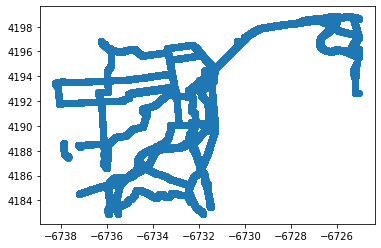

In [32]:
import matplotlib.pyplot as plt
plt.scatter(RXY[:,0],RXY[:,1])

In [10]:
import json
s=open('vdsn.geojson','r').read()
VDS = json.loads(s)

In [33]:
VID = []
VXY = []
for V in VDS['features']:
    VID.append(V['properties']['vds'])
    X,Y = V['geometry']['coordinates']
    VXY.append([X*55,Y*111])
VXY = np.array(VXY)

In [ ]:
# lat 1° = 111 km  (or 60 nautical miles)
# Convert your latitude into decimal degrees ~ 37.26383

# Convert your decimal degrees into radians ~ 0.65038

# Take the cosine of the value in radians ~ 0.79585

# 1 degree of Longitude = ~0.79585 * 69.172 = ~ 55.051 miles

In [22]:
-122*55, 37*111, 

(-6710, 4107)

In [34]:
from sklearn.neighbors import NearestNeighbors

In [69]:
knn = NearestNeighbors(n_neighbors=3, radius=0.010)
knn.fit(RXY)

NearestNeighbors(n_neighbors=3, radius=0.01)

In [70]:
RNN = np.array(knn.kneighbors(RXY, return_distance=False))

In [58]:
knn = NearestNeighbors(n_neighbors=1, radius=0.010)
knn.fit(RXY)
VNN = np.array(knn.kneighbors(VXY, return_distance=False)).ravel()

In [59]:
VNN

array([ 36989,  45057, 131252, 131562, 131860, 132042,  78098,  78110,
        78171,  78250,  78293,  78353,  78462,  78536,  78639,  78710,
        78780,   9123, 148768,  78111,  78124,  78147,  78189,  78249,
        78303,  78363,  78461,  78533,  78621,  78704,  78774,  62483,
         1310,   9968,  58572, 149531,  57882,  23849,  23849, 144363,
       144524,  73547,  73578,  62502,  58018,  41995,  41995, 121188,
        57555,  44543,  44543,  44425,  44317,  36638,  73927, 127811,
       127811, 130179, 130179, 136708, 134854, 134864, 150094, 149959,
       149061, 135376, 135376,   2764,   6691,  14906,  60688, 150760,
       150695, 150690,  60515,  35091,  60164,  59926,  59926,   4909,
        60569,  42564], dtype=int64)

In [200]:
rec = 0
recset=[]

def talk(rid):
    global rec
    global recset
    near = RNN[rid]
    
    for n in near:
        if n not in recset:
            rec+=1
            
            if rec>100:
                return recset
            
            recset.append(n)
            talk(n)
    
    return recset

In [201]:
talk(36990)

[36990,
 36991,
 36992,
 36993,
 36994,
 36995,
 36996,
 36997,
 36998,
 36999,
 37000,
 37001,
 37002,
 37003,
 37004,
 37005,
 37006,
 37007,
 37008,
 37009,
 37010,
 37011,
 37012,
 37013,
 37014,
 15347,
 15348,
 15349,
 15350,
 15351,
 15352,
 15353,
 15354,
 15355,
 15356,
 15357,
 15358,
 15359,
 15360,
 15361,
 15362,
 15363,
 15364,
 15365,
 15366,
 15367,
 15368,
 15369,
 15370,
 15371,
 15372,
 15373,
 15374,
 15375,
 15376,
 15377,
 15378,
 15379,
 15380,
 15381,
 15382,
 15383,
 15384,
 15385,
 15386,
 15387,
 15388,
 15389,
 15390,
 15391,
 15392,
 15393,
 15394,
 15395,
 15396,
 15397,
 15398,
 15399,
 15400,
 15401,
 15402,
 15403,
 15404,
 15405,
 15406,
 15407,
 15408,
 15409,
 15410,
 15411,
 15412,
 15413,
 15414,
 15415,
 15416,
 15417,
 15418,
 15419,
 15420,
 15421]

In [202]:
VMAP={}
for idx in range(len(VNN)):
    rid = VNN[idx]
    VMAP[VID[idx]] = talk(rid)

In [203]:
VMAP

{416144: [36990,
  36991,
  36992,
  36993,
  36994,
  36995,
  36996,
  36997,
  36998,
  36999,
  37000,
  37001,
  37002,
  37003,
  37004,
  37005,
  37006,
  37007,
  37008,
  37009,
  37010,
  37011,
  37012,
  37013,
  37014,
  15347,
  15348,
  15349,
  15350,
  15351,
  15352,
  15353,
  15354,
  15355,
  15356,
  15357,
  15358,
  15359,
  15360,
  15361,
  15362,
  15363,
  15364,
  15365,
  15366,
  15367,
  15368,
  15369,
  15370,
  15371,
  15372,
  15373,
  15374,
  15375,
  15376,
  15377,
  15378,
  15379,
  15380,
  15381,
  15382,
  15383,
  15384,
  15385,
  15386,
  15387,
  15388,
  15389,
  15390,
  15391,
  15392,
  15393,
  15394,
  15395,
  15396,
  15397,
  15398,
  15399,
  15400,
  15401,
  15402,
  15403,
  15404,
  15405,
  15406,
  15407,
  15408,
  15409,
  15410,
  15411,
  15412,
  15413,
  15414,
  15415,
  15416,
  15417,
  15418,
  15419,
  15420,
  15421],
 416145: [36990,
  36991,
  36992,
  36993,
  36994,
  36995,
  36996,
  36997,
  36998,
  

In [204]:
import json
s=open('inc.geojson','r').read()
INC = json.loads(s)

In [205]:
IXY = []
IID = []
for vidx in range(len(INC['features'])):
    V = INC['features'][vidx]
    X,Y = V['geometry']['coordinates']
    IXY.append([X*55,Y*111])
#     print(V)
    IID.append(V['properties']['ID'])

In [206]:
IXY = np.array(IXY)

In [207]:
len(IXY)

9275

In [208]:
knn = NearestNeighbors(n_neighbors=1, radius=0.015)
knn.fit(RXY)
IRN = knn.kneighbors(IXY, return_distance=True)

In [209]:
IXY = np.array(IXY)[(IRN[0].ravel()<0.015)]

In [210]:
IID = np.array(IID)[(IRN[0].ravel()<0.015)]

In [211]:
IRN = np.array(IRN[1])[(IRN[0].ravel()<0.015)]

In [212]:
IRN

array([[134844],
       [121277],
       [120987],
       ...,
       [ 23809],
       [ 93168],
       [ 24774]], dtype=int64)

In [218]:
RES=[]
from tqdm import tqdm

for id in tqdm(IRN):
    ID = id[0]
    for k in VMAP.keys():
        if ID in VMAP[k]:
            RES.append(k)
        else:
            RES.append(-1)
#     print()

100%|██████████| 8771/8771 [00:00<00:00, 8948.53it/s]


In [131]:
TXY = []
for T in talk(36990):
    X,Y = RXY[T]
    TXY.append([X,Y])

In [132]:
TXY = np.array(TXY)

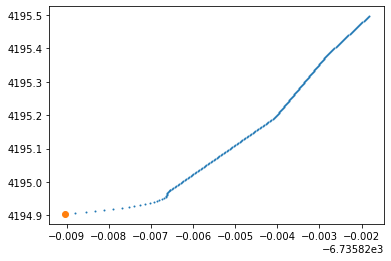

In [133]:
plt.scatter(TXY[:,0],TXY[:,1],s=1)
plt.scatter(RXY[36990][0],RXY[36990][1])

In [73]:

for idx in range(len(VNN)):
    rid = VNN[idx] 
    #land on nearest pont
    #
    near = RNN[rid]
    
    for N in near:
        print(N)
        print(RNN[N])
    
    break

36989
[36989 36988 36990]
36988
[36988 36987 36989]
36990
[36990 36991 36989]


In [113]:
VNN

array([ 36989,  45057, 131252, 131562, 131860, 132042,  78098,  78110,
        78171,  78250,  78293,  78353,  78462,  78536,  78639,  78710,
        78780,   9123, 148768,  78111,  78124,  78147,  78189,  78249,
        78303,  78363,  78461,  78533,  78621,  78704,  78774,  62483,
         1310,   9968,  58572, 149531,  57882,  23849,  23849, 144363,
       144524,  73547,  73578,  62502,  58018,  41995,  41995, 121188,
        57555,  44543,  44543,  44425,  44317,  36638,  73927, 127811,
       127811, 130179, 130179, 136708, 134854, 134864, 150094, 149959,
       149061, 135376, 135376,   2764,   6691,  14906,  60688, 150760,
       150695, 150690,  60515,  35091,  60164,  59926,  59926,   4909,
        60569,  42564], dtype=int64)

In [2]:
import json
s=open('vdsn.geojson','r').read()
VDS = json.loads(s)

In [3]:
import json
s=open('inc.geojson','r').read()
INC = json.loads(s)

In [4]:
import json
s=open('map.geojson','r').read()
MAP = json.loads(s)

In [ ]:
idx = 0
for vidx in range(len(INC['features'])):
    INC['features'][vidx]['index'] = idx
    idx+=1

In [37]:
AINC = []
for vidx in range(len(INC['features'])):
    V = INC['features'][vidx]
    AINC.append([-1,V['geometry']['coordinates'], V['properties']['ID']])

In [20]:
AXYS = []
AVDS = []
for V in VDS['features']:
    AVDS.append([V['properties']['vds'],V['geometry']['coordinates']])
    AXYS.append(V['geometry']['coordinates'])

In [39]:
AMAP = []
idx=0
for V in MAP['features']:
#     for C in :
    AMAP.append([idx, V['geometry']['coordinates'][0]])
    idx+=1

In [40]:
# AINC=np.array(AINC)
AMAP

[[0,
  [[-122.3947824, 37.7081006],
   [-122.3949811, 37.7089804],
   [-122.3951419, 37.7096426],
   [-122.3953406, 37.7104089],
   [-122.3954919, 37.7111657],
   [-122.3957379, 37.7120171],
   [-122.3960596, 37.7126699],
   [-122.3964758, 37.7133037],
   [-122.3969299, 37.7138997],
   [-122.397507, 37.7145903],
   [-122.3977908, 37.7149025]]],
 [1,
  [[-122.3950284, 37.7080438],
   [-122.395123, 37.7084695],
   [-122.3952176, 37.7088952],
   [-122.3953122, 37.7093872],
   [-122.3954257, 37.7097845],
   [-122.3955487, 37.7102291],
   [-122.3955865, 37.7105697],
   [-122.395719, 37.7110616],
   [-122.395842, 37.711563],
   [-122.395965, 37.711932],
   [-122.3962109, 37.7124334],
   [-122.3964569, 37.7128212],
   [-122.396788, 37.7133416],
   [-122.3971664, 37.7138713],
   [-122.3974786, 37.7142024],
   [-122.3977529, 37.7144484],
   [-122.39798, 37.7147795],
   [-122.3981219, 37.715016]]],
 [2,
  [[-122.3983016, 37.7152525],
   [-122.3984435, 37.7154417],
   [-122.398576, 37.715612],
  

In [41]:
# XES=[]
# YES=[]
# for idx,xy in AMAP:
#     print(xy)
#     XES.append(xy[0])
#     YES.append(xy[1])

In [42]:
for lidx in range(len(AMAP)):
    L = AMAP[lidx]
    print(L[1])
    
    A=[]
    for P in L[1]:
        vdsidx,dist = hav(P, AXYS)
        A.append([vdsidx,dist])
    AMAP[lidx][0] = AVDS[sorted(A,key=lambda v: v[1])[0][0]][0]
#     break

[[-122.3947824, 37.7081006], [-122.3949811, 37.7089804], [-122.3951419, 37.7096426], [-122.3953406, 37.7104089], [-122.3954919, 37.7111657], [-122.3957379, 37.7120171], [-122.3960596, 37.7126699], [-122.3964758, 37.7133037], [-122.3969299, 37.7138997], [-122.397507, 37.7145903], [-122.3977908, 37.7149025]]
[[-122.3950284, 37.7080438], [-122.395123, 37.7084695], [-122.3952176, 37.7088952], [-122.3953122, 37.7093872], [-122.3954257, 37.7097845], [-122.3955487, 37.7102291], [-122.3955865, 37.7105697], [-122.395719, 37.7110616], [-122.395842, 37.711563], [-122.395965, 37.711932], [-122.3962109, 37.7124334], [-122.3964569, 37.7128212], [-122.396788, 37.7133416], [-122.3971664, 37.7138713], [-122.3974786, 37.7142024], [-122.3977529, 37.7144484], [-122.39798, 37.7147795], [-122.3981219, 37.715016]]
[[-122.3983016, 37.7152525], [-122.3984435, 37.7154417], [-122.398576, 37.715612], [-122.39868, 37.7158675], [-122.3987841, 37.7160472], [-122.3989071, 37.7163121], [-122.3990585, 37.7167283], [-12

In [43]:
AMAP2=[]
AMAP2XY=[]
for A in AMAP:
    for P in A[1]:
        AMAP2.append([A[0],P])
        AMAP2XY.append(P)

In [44]:
from tqdm import tqdm
for lidx in tqdm(range(len(AINC))):
    pt1 = [AINC[lidx][1][0],AINC[lidx][1][1]]
    
    mapidx,dist = hav(pt1,AMAP2XY)
#     print(dist)
    if dist<7:
        AINC[lidx][0] = AMAP2[mapidx][0]
    else:
        AINC[lidx][0] = -1

100%|██████████| 9275/9275 [00:22<00:00, 405.96it/s]


In [45]:
AINC2 = list(filter(lambda v: v[0]!=-1, AINC))

In [46]:
len(AINC2)

2751

In [49]:
pd.DataFrame(AINC2).to_csv('INCX.csv',index=False)

In [34]:
import numpy as np
import pandas as pd
pd.DataFrame(np.array(AINC)).to_csv('INCX.csv',index=False)

C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
import pandas as pd
pd.DataFrame(INC['features'][AINC2[0][2]]).T

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Duration,type,coordinates
type,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,...,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature
properties,A-973,MapQuest,241.0,2,2016-06-23 06:42:10,2016-06-23 07:34:18,37.752502,-122.403008,None,None,...,False,False,Day,Day,Day,Day,6,52,NaN,NaN
geometry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Point,"[-122.403008, 37.752502]"


In [22]:
for lidx in range(len(AMAP)):
    pt1 = [AMAP[lidx][1][0],AMAP[lidx][1][1]]
#     print(pt1)
    vdsidx,dist = hav(pt1, AXYS)
#     if dist<10:
    AMAP[lidx][0] = AVDS[vdsidx][0]
    print(pt1,dist,vdsidx)

[-122.3947824, 37.7081006] 315.2484311130023 31
[-122.3949811, 37.7089804] 214.9241861868363 31
[-122.3951419, 37.7096426] 139.13793533867158 31
[-122.3953406, 37.7104089] 51.23981794262679 31
[-122.3954919, 37.7111657] 34.714757071240854 31
[-122.3957379, 37.7120171] 131.49862126844832 43
[-122.3960596, 37.7126699] 208.74401420949303 43
[-122.3964758, 37.7133037] 289.1592309760818 43
[-122.3969299, 37.7138997] 369.0207001353232 43
[-122.397507, 37.7145903] 329.18878006839395 32
[-122.3977908, 37.7149025] 283.6953029567402 32
[-122.3950284, 37.7080438] 316.5785708858062 31
[-122.395123, 37.7084695] 268.27247270495536 31
[-122.3952176, 37.7088952] 220.05411726149654 31
[-122.3953122, 37.7093872] 164.63883070685796 31
[-122.3954257, 37.7097845] 119.85330681030379 43
[-122.3955487, 37.7102291] 68.69545017931472 43
[-122.3955865, 37.7105697] 30.71928841332272 43
[-122.395719, 37.7110616] 25.963371196123056 43
[-122.395842, 37.711563] 83.36449456813888 43
[-122.395965, 37.711932] 126.567146

[-122.4030176, 37.75261] 109.42891617446097 49
[-122.4030247, 37.7525508] 115.94247785399605 49
[-122.4030247, 37.7524964] 121.98141701515311 49
[-122.4030223, 37.7524704] 124.88432438464388 49
[-122.4030223, 37.7524042] 132.23436687373214 49
[-122.4030247, 37.7523569] 137.47210806094967 49
[-122.4030294, 37.7523001] 143.7548333944326 49
[-122.4030341, 37.7522576] 148.45321559273305 49
[-122.4030365, 37.7522032] 154.48779514728173 49
[-122.403046, 37.7521606] 159.1851661967343 49
[-122.403046, 37.752118] 163.9211865865614 49
[-122.4030483, 37.7520814] 167.98269324985398 49
[-122.4030531, 37.7520305] 173.6279205749811 49
[-122.4030566, 37.7519998] 177.0325790059968 49
[-122.4030554, 37.7519572] 181.772763552784 49
[-122.4030661, 37.7519146] 186.48788137905723 49
[-122.4030672, 37.7518898] 189.24424007132674 49
[-122.4030743, 37.7518531] 193.31632377899814 49
[-122.4030803, 37.7518165] 197.3816169994367 49
[-122.4030933, 37.751781] 201.32604992441946 49
[-122.4031051, 37.7517455] 205.279

In [124]:
for lidx in range(len(AINC)):
    
    pt1 = [AINC[lidx][0],AINC[lidx][1]]
    
#     print(pt1)
    vdsidx,dist = hav(pt1, XYS)
    print(dist)
    AINC[lidx] = [AINC[lidx],AVDS[vdsidx][0]]

22.38185093780015
27.626302782906667
35.38459165392459
10.88598940179536
1370.3196554081583
9.868871126519673
378.6069375305407
220.91656558832153
432.3308691679519
1.9566837645091064
17.29714947437166
36.279076535705286
1.8442191291988845
28.226996432681076
46.45743610614255
36.279076535705286
220.91656558832153
333.76029003962725
118.01119233601297
867.2969873975603
1.825770852273232
411.547965287853
15.549642014981659
852.8517280829141
22.38185093780015
9.054102619160329
2.296574529422976
2839.0810336152194
4.4986453544351
2596.1364587128783
432.3308691679519
220.91656558832153
596.6321699411652
220.91656558832153
16.6803613003125
538.9698687415104
474.3180546765524
46.45743610614255
1572.675436972455
4.382614005360356
1370.3196554081583
2.296574529422976
10.349414477128077
46.84354982403582
46.45743610614255
16.6803613003125
196.16356989483737
20.844196477963063
36.279076535705286
432.3308691679519
1370.3196554081583
1370.3196554081583
108.79312733359838
333.76029003962725
13.08952

5.991302324075455
4.4627714469539095
432.3308691679519
380.04659508304616
220.91656558832153
4.131098312086369
6.431009041430913
8.39702189788966
172.26053970230163
1.2551287810670835
2.5500951186450234
852.8517280829141
46.967864823649236
0.6932390532141863
5.991302324075455
95.42929584458219
1.5890275430636174
773.7887067696462
692.1728535115786
4.428989302058357
4190.1087158826695
2.5500951186450234
326.91671366663303
1141.8823109170057
1141.8823109170057
432.3308691679519
1435.9744013147304
1494.2093833565386
425.1110999951448
46.84354982403582
12.197742179013844
4.700561138658448
18.02720490649784
371.588055083433
536.3315640800753
28.226996432681076
2329.6507270873763
538.9698687415104
334.0874710685195
1.9566837645091064
5.317172403830789
590.4613511271444
360.50598608108913
927.2491473274132
20.468656598646724
14.85696546829772
3.162887009183585
33.45013800883926
538.9698687415104
13.08952419070349
60.038035829136255
108.79312733359838
536.3315640800753
28.226996432681076
1.844

852.8517280829141
46.45743610614255
432.3308691679519
538.9698687415104
4.667402197945045
1.3981691355726131
910.0143431302926
108.79312733359838
462.95847883945453
504.1105813497874
5.991302324075455
399.16482303098763
220.91656558832153
1240.2393451992039
2341.954103919625
538.9698687415104
432.3308691679519
1328.071012429587
535.4042352753572
4.621393290686988
3.0654690761086094
62.37541175453168
693.2080298764594
18.819914253990675
1250.0409440856613
220.91656558832153
24.139903974854416
17.801324567072214
1370.3196554081583
220.91656558832153
97.25094924330114
12.197742179013844
60.038035829136255
220.91656558832153
334.0874710685195
317.257054561735
314.88871671417866
538.9698687415104
1329.6542948340486
1312.3623609827828
361.97420922237677
536.3315640800753
46.45743610614255
8.39702189788966
22.38185093780015
36.804319295034574
1141.8823109170057
4.131098312086369
0.5932711996275444
1370.3196554081583
4.700561138658448
2.5500951186450234
595.8361431998508
2.215295485442216
10.3

28.226996432681076
28.226996432681076
2.021176718615316
3.0654690761086094
1.9566837645091064
220.91656558832153
10.252964951728732
3.162887009183585
334.0874710685195
852.8517280829141
371.588055083433
451.42902429944854
1.8442191291988845
1360.3340859114821
36.279076535705286
153.582176732802
262.47694934897606
928.8330326631622
29.87237883102865
478.6171638652987
29.87237883102865
1.0931438904222763
2.9629993308109506
587.635610744036
11.313403335743569
2.641588865414006
546.1662689236231
587.635610744036
20.536073856744324
735.6833087173144
109.55063153474511
3650.140764849432
587.635610744036
7.704718508639146
380.28613293988036
262.47694934897606
1.1417283184109641
5.414677082013869
1295.8398379887713
433.5238973146931
0.8570474359726291
230.16900810266785
24.73309730643205
587.635610744036
29.87237883102865
2580.401993774743
3.648252586682802
93.87286637742963
22.63777286268025
1295.8398379887713
29.87237883102865
3.4529019001092798
527.3595678792127
532.530916366046
7.704718508

KeyboardInterrupt: 

In [125]:
AINC

[[[-122.448273, 37.719162], -122.406052],
 [[-122.404938, 37.732746], -122.405113],
 [[-122.403236, 37.749485], -122.405762],
 [[-122.415413, 37.731983], -122.406563],
 [[-122.475616, 37.807072], -122.435219],
 [[-122.392464, 37.756107], -122.414513],
 [[-122.39267, 37.784885], -122.403008],
 [[-122.39138, 37.785542], -122.403008],
 [[-122.405533, 37.769375], -122.387558],
 [[-122.403008, 37.752502], -122.407997],
 [[-122.435219, 37.731277], -122.446198],
 [[-122.408661, 37.734898], -122.402832],
 [[-122.414513, 37.732208], -122.420593],
 [[-122.405113, 37.764633], -122.392799],
 [[-122.417847, 37.769646], -122.406639],
 [[-122.408661, 37.734898], -122.402832],
 [[-122.39138, 37.785542], -122.403008],
 [[-122.401169, 37.778088], -122.392647],
 [[-122.407814, 37.735943], -122.416885],
 [[-122.396065, 37.781151], -122.414909],
 [[-122.396194, 37.767639], -122.405533],
 [[-122.400322, 37.778683], -122.392647],
 [[-122.432076, 37.732281], -122.472435],
 [[-122.39724, 37.781715], -122.41490

In [1]:
import json
s=open('mapping.geojsonl.json','r').read().split('\n')
ARR=[]
for L in s:
    print(L)
    ARR.append(json.loads(L))

In [23]:
s=open('inc.geojsonl.json','r').read().split('\n')

In [24]:
s

['{ "type": "Feature", "properties": { "ID": "A-736", "Source": "MapQuest", "TMC": 201.0, "Severity": 3, "Start_Time": "2016-06-21 10:51:31", "End_Time": "2016-06-21 11:21:31", "Start_Lat": 37.719162, "Start_Lng": -122.448273, "End_Lat": null, "End_Lng": null, "Distance(mi)": 0.0, "Description": "Accident on I-280 Northbound at Geneva Ave.", "Number": null, "Street": "John F Foran Fwy", "Side": "R", "City": "San Francisco", "County": "San Francisco", "State": "CA", "Zipcode": "94112", "Country": "US", "Timezone": "US\\/Pacific", "Airport_Code": "KSFO", "Weather_Timestamp": "2016-06-21 10:56:00", "Temperature(F)": 71.1, "Wind_Chill(F)": null, "Humidity(%)": 55.0, "Pressure(in)": 30.04, "Visibility(mi)": 10.0, "Wind_Direction": "NE", "Wind_Speed(mph)": 4.6, "Precipitation(in)": null, "Weather_Condition": "Partly Cloudy", "Amenity": "False", "Bump": "False", "Crossing": "False", "Give_Way": "False", "Junction": "False", "No_Exit": "False", "Railway": "False", "Roundabout": "False", "Stati

In [22]:
import json
s=open('inc.geojsonl.json','r').read().split('\n')
ARR=[]
for L in s:
    print(L)
    ARR.append(json.loads(L))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
AC=[]
COORDS=[]
for idx in range(len(ARR)):
    A = ARR[idx]
    
    for C in ARR[0]['geometry']['coordinates'][0]:
        COORDS.append([idx,C[0],C[1]])
#     AC.append(COORDS)

In [8]:
import numpy as np
COORDS = np.array(COORDS)

In [9]:
import matplotlib.pyplot as plt

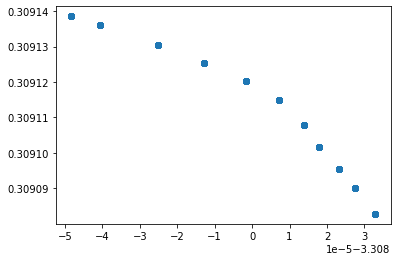

In [13]:
plt.scatter(COORDS[:,1]/37,COORDS[:,2]/122)

In [14]:
COORDS[:,2]

array([37.7081006, 37.7089804, 37.7096426, 37.7104089, 37.7111657,
       37.7120171, 37.7126699, 37.7133037, 37.7138997, 37.7145903,
       37.7149025, 37.7081006, 37.7089804, 37.7096426, 37.7104089,
       37.7111657, 37.7120171, 37.7126699, 37.7133037, 37.7138997,
       37.7145903, 37.7149025, 37.7081006, 37.7089804, 37.7096426,
       37.7104089, 37.7111657, 37.7120171, 37.7126699, 37.7133037,
       37.7138997, 37.7145903, 37.7149025, 37.7081006, 37.7089804,
       37.7096426, 37.7104089, 37.7111657, 37.7120171, 37.7126699,
       37.7133037, 37.7138997, 37.7145903, 37.7149025, 37.7081006,
       37.7089804, 37.7096426, 37.7104089, 37.7111657, 37.7120171,
       37.7126699, 37.7133037, 37.7138997, 37.7145903, 37.7149025,
       37.7081006, 37.7089804, 37.7096426, 37.7104089, 37.7111657,
       37.7120171, 37.7126699, 37.7133037, 37.7138997, 37.7145903,
       37.7149025, 37.7081006, 37.7089804, 37.7096426, 37.7104089,
       37.7111657, 37.7120171, 37.7126699, 37.7133037, 37.7138

In [15]:
import pandas as pd

dt = pd.read_csv('sf_vds.csv',sep=';')
VDSXY = dt.loc[:,['X','Y']].values
VDSID = dt.vds.values


from numba import jit
import random
from math import sin, cos, sqrt, atan2, radians

# dlon = radians(lon2) - radians(lon1)
# dlat = radians(lat2) - radians(lat1)
    
# a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

# @jit(nopython=True)
def hav(p1,arr):
    distarr=[]
    for idx in range(len(arr)):
        p2=arr[idx]
        R = 6373000.0
        dlon = radians(p2[0]) - radians(p1[0])
        dlat = radians(p2[1]) - radians(p1[1])
        a = sin(dlat / 2)**2 + cos(p1[1]) * cos(p2[1]) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distarr.append(R * c)
    
    m = 100000000000
    midx=-1
    for idx in range(len(distarr)):
        if distarr[idx]<m:
            m=distarr[idx]
            midx=idx
    
    return midx,m

In [16]:
for lidx in range(len(COORDS)):
    pt1 = [COORDS[lidx][1],COORDS[lidx][2]]
#     pt2 = LINES2[lidx][1]
    
    vdsidx,dist = hav(pt1, VDSXY)
    COORDS[lidx][0] = VDSID[vdsidx]

In [17]:
COORDS

array([[ 4.04528000e+05, -1.22394782e+02,  3.77081006e+01],
       [ 4.04528000e+05, -1.22394981e+02,  3.77089804e+01],
       [ 4.04528000e+05, -1.22395142e+02,  3.77096426e+01],
       ...,
       [ 4.04569000e+05, -1.22396930e+02,  3.77138997e+01],
       [ 4.01795000e+05, -1.22397507e+02,  3.77145903e+01],
       [ 4.01795000e+05, -1.22397791e+02,  3.77149025e+01]])

In [18]:
np.array(COORDS)

array([[ 4.04528000e+05, -1.22394782e+02,  3.77081006e+01],
       [ 4.04528000e+05, -1.22394981e+02,  3.77089804e+01],
       [ 4.04528000e+05, -1.22395142e+02,  3.77096426e+01],
       ...,
       [ 4.04569000e+05, -1.22396930e+02,  3.77138997e+01],
       [ 4.01795000e+05, -1.22397507e+02,  3.77145903e+01],
       [ 4.01795000e+05, -1.22397791e+02,  3.77149025e+01]])

In [19]:

np.array(COORDS)[:,1:3]

array([[-122.3947824,   37.7081006],
       [-122.3949811,   37.7089804],
       [-122.3951419,   37.7096426],
       [-122.3953406,   37.7104089],
       [-122.3954919,   37.7111657],
       [-122.3957379,   37.7120171],
       [-122.3960596,   37.7126699],
       [-122.3964758,   37.7133037],
       [-122.3969299,   37.7138997],
       [-122.397507 ,   37.7145903],
       [-122.3977908,   37.7149025],
       [-122.3947824,   37.7081006],
       [-122.3949811,   37.7089804],
       [-122.3951419,   37.7096426],
       [-122.3953406,   37.7104089],
       [-122.3954919,   37.7111657],
       [-122.3957379,   37.7120171],
       [-122.3960596,   37.7126699],
       [-122.3964758,   37.7133037],
       [-122.3969299,   37.7138997],
       [-122.397507 ,   37.7145903],
       [-122.3977908,   37.7149025],
       [-122.3947824,   37.7081006],
       [-122.3949811,   37.7089804],
       [-122.3951419,   37.7096426],
       [-122.3953406,   37.7104089],
       [-122.3954919,   37.7111657],
 

In [81]:
IC[:,]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [20]:
import matplotlib.pyplot as plt
plt.scatter(IC[:,0],IC[:,1])

NameError: name 'IC' is not defined

In [21]:
import numpy as np
dt = pd.read_csv('SF_complete.csv')
IC = dt.loc[:,['Start_Lng','Start_Lat']].values

IV = []
from tqdm import tqdm
for idx in tqdm(range(len(IC))):
    pt,dist = hav(IC[idx],np.array(COORDS)[:,1:3])
    
    print(dist)
    if dist<=6:
        IV.append(COORDS[pt][0])
    else:
        IV.append(-1)

IV.count(-1)

  2%|▏         | 186/9275 [00:00<00:11, 791.26it/s]

5634.168184363142
2137.922190144886
3893.9310551290623
2729.2795033903185
13401.218315277838
4621.242864721707
7804.874030308226
7889.386161661962
6119.702852264384
4222.19334613927
4542.8846599714525
2531.281378170799
2676.2839348113184
5591.017701624786
6483.899622195306
2531.281378170799
7889.386161661962
7038.117825626207
2592.1241711145954
7371.300789414933
5868.553781464958
7099.860536707876
4274.315434211129
7431.794870919286
5634.168184363142
29.93888677729115
5651.098780778216
8691.352035544782
5513.296040783178
9415.200171858463
6119.702852264384
7889.386161661962
2560.3563470388035
7889.386161661962
708.6300843952283
6781.910362783676
6475.641774415163
6483.899622195306
4404.965557090868
3392.11507078905
13401.218315277838
5651.098780778216
5034.1828617167375
2202.9299110379975
6483.899622195306
708.6300843952283
5794.66359085798
6531.431363390557
2531.281378170799
6119.702852264384
13401.218315277838
13401.218315277838
3963.0463116527208
7038.117825626207
8066.899257831602


  4%|▍         | 382/9275 [00:00<00:10, 864.64it/s]

7889.386161661962
5656.127131617265
1092.387892818443
6119.702852264384
6755.095374233661
2531.281378170799
7247.5992436274555
7860.702969464766
8066.899257831602
6483.899622195306
4853.199713587978
7889.386161661962
7099.860536707876
3997.1910414524145
2643.9449404285665
1784.1755805404146
7889.386161661962
2676.2839348113184
5872.797792528763
2713.7108882966963
7889.386161661962
6276.647809071425
5591.017701624786
6119.702852264384
2713.7108882966963
5634.168184363142
13401.218315277838
4272.40775122403
5034.1828617167375
8066.899257831602
5998.5147776041385
5634.168184363142
3963.0463116527208
5651.098780778216
6568.780098997522
6119.702852264384
13401.218315277838
2568.553204761663
1852.7977666900163
2873.8247825762846
2572.3065295019824
3883.3379986275686
5294.8860897343875
7246.3971957286585
5518.791568396924
4931.565714494901
6529.606584133452
4222.19334613927
3963.0463116527208
2676.2839348113184
2531.281378170799
2531.281378170799
5634.168184363142
4253.134253203233
7605.41977

  6%|▋         | 587/9275 [00:00<00:09, 900.04it/s]

6835.573042965864
7550.00568925446
5655.934850804124
6781.910362783676
6483.899622195306
6423.286617521813
4222.19334613927
6781.910362783676
13401.218315277838
5513.296040783178
7231.6964995394455
7038.117825626207
5294.8860897343875
4289.014485812729
5714.717778945524
5294.8860897343875
5294.8860897343875
4135.935905961899
4542.8846599714525
1607.1488657088971
3346.0007560751214
6529.606584133452
6848.337416424891
6696.721138108776
3346.0007560751214
10874.987325277996
6961.616431564682
2406.7104085358874
4930.276745962586
4222.19334613927
13316.202274438643
5662.3008700860655
7676.267972636887
1803.6527499930808
5998.5147776041385
7889.386161661962
8360.351034566145
3169.3985281611285
7103.186289463396
4702.383913602468
5659.532495986214
11812.105024439577
6276.647809071425
6923.837820621691
3880.9644105313178
2713.7108882966963
3138.802702402609
4222.19334613927
4222.19334613927
2583.613319266623
3452.2965054376336
6119.702852264384
7815.294569309548
7889.386161661962
5512.35975902

  8%|▊         | 774/9275 [00:00<00:09, 896.16it/s]

7041.479245662721
6529.606584133452
13401.218315277838
5294.8860897343875
4217.0079945068
7038.117825626207
708.6300843952283
931.5933157927816
13462.652935109096
4289.014485812729
6392.091899480016
708.6300843952283
514.5771891717866
5659.532495986214
2729.2795033903185
16.963026471725357
7804.874030308226
5651.098780778216
5294.8860897343875
2973.4518967880817
7889.386161661962
4517.467578166566
10874.987325277996
5294.8860897343875
5294.8860897343875
8066.899257831602
13401.218315277838
7821.532389554035
5634.168184363142
13323.848514872341
3963.0463116527208
5034.1828617167375
7889.386161661962
5874.999285472444
7038.117825626207
5634.168184363142
3020.8408953114767
4222.19334613927
6781.910362783676
5962.068568563048
7889.386161661962
6444.458202899875
2390.407854417941
6656.093618908988
2676.2839348113184
2531.281378170799
2531.281378170799
7969.009981275857
5659.532495986214
13401.218315277838
6632.482531058145
7889.386161661962
2531.281378170799
514.5771891717866
6529.606584133

 10%|█         | 951/9275 [00:01<00:09, 865.15it/s]

2729.2795033903185
13401.218315277838
13401.218315277838
4274.315434211129
11727.424304184995
6207.014239486148
3346.0007560751214
5988.983398529043
6119.702852264384
1047.812150544385
5794.388176357466
1863.4567532426406
4290.885395961109
11495.497754569982
13401.218315277838
29.93888677729115
2322.593061201948
3832.2173972541814
6529.606584133452
5659.532495986214
7051.513575394846
6550.485579177032
5539.42518870754
6776.841061099598
6781.910362783676
5655.971746651832
5294.8860897343875
1803.326669987867
3236.979013750688
5794.66359085798
9682.617538258815
7756.561455568103
3038.247533489493
6423.286617521813
6529.606584133452
8392.222726585787
10167.933090091863
4135.935905961899
6119.702852264384
8272.391424756905
5634.168184363142
5294.8860897343875
13401.218315277838
11418.5856089142
7532.348738780879
6696.721138108776
29.93888677729115
2729.2795033903185
4930.276745962586
5033.261174394252
3346.0007560751214
4274.315434211129
5294.8860897343875
5634.168184363142
8103.5750799295

 12%|█▏        | 1123/9275 [00:01<00:09, 827.49it/s]


2406.7104085358874
8108.206047926032
2713.7108882966963
30.651128348408747
2873.8247825762846
253.74885921336204
7532.348738780879
7889.386161661962
4222.19334613927
6444.458202899875
10.910380738584866
6529.606584133452
3963.0463116527208
708.6300843952283
3963.0463116527208
7889.386161661962
13324.995493129527
2531.281378170799
4222.19334613927
2583.613319266623
5294.8860897343875
6632.482531058145
7889.386161661962
1221.131657986656
5294.8860897343875
8066.899257831602
5432.320860676483
6529.606584133452
10111.024404299733
7621.121518907379
3880.236062240561
4272.40775122403
7099.860536707876
6664.830569077348
3038.575089673336
2531.281378170799
1271.5754106728452
13401.218315277838
6392.091899480016
8182.181431623955
8419.050605066499
2021.0426034489367
2560.5282261436414
2676.2839348113184
9534.355708692161
2729.2795033903185
3426.163125227207
2729.2795033903185
8393.277410213612
7099.860536707876
28.205840120399913
3426.163125227207
7038.492513502512
7500.115060131236
1221.13165

 14%|█▍        | 1287/9275 [00:01<00:10, 794.92it/s]


5641.440236829171
6483.899622195306
6636.399221944571
6483.899622195306
2729.2795033903185
4542.8846599714525
4222.19334613927
8448.10120505332
3346.2311922360445
6119.702852264384
2474.874294380246
7889.386161661962
6276.647809071425
7431.794870919286
7038.492513502512
5998.5147776041385
4220.540746096005
452.74311771337517
6444.458202899875
1047.812150544385
3963.0463116527208
7756.561455568103
7038.492513502512
6781.910362783676
3346.2311922360445
3963.0463116527208
11603.436463814103
12631.118642585692
5659.532495986214
4272.40775122403
7550.00568925446
2729.2795033903185
3963.0463116527208
5659.532495986214
13401.218315277838
3426.163125227207
1482.945756849076
7038.492513502512
5294.8860897343875
3832.2173972541814
13356.583784412167
16.52770442479399
2713.7108882966963
4272.40775122403
4272.40775122403
4931.565714494901
5659.532495986214
6649.822762355619
5794.388176357466
2873.8247825762846
4612.996151870702
4979.374442658856
5651.098780778216
5634.168184363142
5034.1828617167

 16%|█▌        | 1450/9275 [00:01<00:09, 783.41it/s]


3832.2173972541814
6070.732530955493
5794.388176357466
5794.388176357466
5998.5147776041385
5998.5147776041385
5651.098780778216
7038.492513502512
4542.8846599714525
2583.613319266623
3963.0463116527208
5440.200397322662
1803.6527499930808
5358.304547724884
4272.40775122403
7889.386161661962
3038.575089673336
2534.07147347027
5634.168184363142
10167.933090091863
3963.0463116527208
7889.386161661962
3905.8900589832974
7889.386161661962
7099.860536707876
6247.441542831713
5294.8860897343875
7889.386161661962
10648.226519235597
6529.606584133452
5998.5147776041385
13401.218315277838
6306.163842554249
6821.087401064252
5449.107255285169
5591.017701624786
10167.933090091863
2531.281378170799
6119.702852264384
7889.386161661962
8272.391424756905
6529.606584133452
5655.934850804124
6939.307558592456
11600.986178842573
7889.386161661962
7038.492513502512
4222.19334613927
6781.910362783676
2531.281378170799
3832.2173972541814
6247.441542831713
7550.00568925446
6713.777178434747
2144.4168722111

 18%|█▊        | 1711/9275 [00:02<00:09, 821.01it/s]

3346.2311922360445
3646.8343171699044
8066.899257831602
4222.19334613927
3346.2311922360445
1092.387892818443
7099.860536707876
8062.996946124585
2482.784794921405
4222.19334613927
6649.888975548916
4251.260366424294
7072.476900593337
6623.634858524529
6675.2935869242565
2531.281378170799
2611.9922375411147
7815.294569309548
2611.9922375411147
3963.0463116527208
7532.348738780879
10854.05885640426
3907.4751393274573
10466.610433440925
7813.281837919267
4222.19334613927
8066.899257831602
3346.2311922360445
5294.8860897343875
3346.2311922360445
7236.773639179458
4804.5451967493345
5294.8860897343875
7889.386161661962
10.910380738584866
5294.8860897343875
6781.910362783676
9612.968539923424
6483.899622195306
7889.386161661962
8066.899257831602
8066.899257831602
13401.218315277838
5794.66359085798
6529.606584133452
6654.144172036258
4222.19334613927
6245.424288066183
6817.384431587248
3963.0463116527208
7815.294569309548
16.52770442479399
3346.2311922360445
13401.218315277838
5651.09878077

 20%|██        | 1893/9275 [00:02<00:08, 857.44it/s]

2713.393873081799
3978.288016133965
5770.098174788439
7207.796581927086
7975.679716420801
8339.660586246082
7890.89952251557
7778.710969161446
10855.836552118442
3187.049313272658
3048.04031914811
4053.548501702719
8692.015107396022
3037.9611064553596
2661.690549726625
3534.4981085353825
3903.4333040619827
5295.036702147864
3534.4981085353825
2712.3579039062965
4364.8720690187065
7983.592761074499
4222.529848900624
4222.529848900624
3832.0210923539885
3707.1440882506236
4620.666695988221
7002.7357529703395
6275.331590883103
7207.796581927086
8066.650804142261
6444.030034781759
2075.1769717043744
3618.4716221047956
8063.305968594619
7426.7514256617815
5673.581214082007
12646.088360451837
5510.424050237952
10241.675218600489
5999.476018664067
2555.7231504479005
5295.036702147864
6950.979163852109
11902.018042555355
4021.2936168053348
7818.448568519123
4222.529848900624
3486.590519838269
3728.283954318723
7287.461314399001
7719.513000220545
4233.209830936403
5676.231356474941
740.62165971

 22%|██▏       | 2065/9275 [00:02<00:08, 822.50it/s]

6573.625213069664
6575.423926262231
11074.971786664777
7890.89952251557
5542.326162082913
1243.472837533283
12074.120481411323
12646.088360451837
5448.572256622778
4225.153409411217
5673.581214082007
6676.340769753026
1092.9374127124315
4493.174667176909
8019.334446847501
4141.982195545037
2391.939172385746
6617.7239922580375
6216.8958065505985
7207.796581927086
1092.9374127124315
5770.098174788439
13139.54727677452
3906.730752507788
7829.108482930927
4493.174667176909
5606.943763379427
7207.796581927086
6216.8958065505985
1935.1118539560628
2503.329327099143
6576.060592664902
8066.650804142261
3662.5563156610797
1487.2596401867763
1487.2596401867763
4289.02133962295
5900.396265183372
4222.529848900624
6676.340769753026
1487.2596401867763
6750.6042099777
5628.664036599536
2307.0964691325335
2874.3526850014046
7180.694472955853
7207.796581927086
6950.979163852109
4554.798822369982
13315.523656555815
5622.102069995764
7552.366362607514
4222.529848900624
5999.476018664067
7880.44679455262

 24%|██▍       | 2249/9275 [00:02<00:08, 852.81it/s]

6950.979163852109
265.4865390294128
3978.288016133965
5770.098174788439
7040.364736129225
8066.650804142261
11.808763401498837
5295.036702147864
5310.090792415421
3264.0758239341935
3426.163125227207
7433.560971981428
5622.102069995764
5295.036702147864
3346.784094753657
7532.318699110362
4222.529848900624
3014.9759381581985
5629.126746977924
6151.777132769861
4222.529848900624
709.2684932110311
6576.060592664902
9523.09922139903
308.5292187462839
6676.340769753026
1487.2596401867763
4222.529848900624
6676.340769753026
2713.393873081799
6151.777132769861
6576.060592664902
7040.364736129225
3903.4333040619827
2555.7231504479005
7890.89952251557
7757.412631765667
1853.1554245359498
5671.64213874778
7784.998139037115
13315.523656555815
2307.0964691325335
6151.777132769861
16.41455218072467
7767.209203972124
6663.3276557918525
9523.09922139903
4493.174667176909
4493.174667176909
7783.393537220686
3946.8825699934696
977.7191180219985
6950.979163852109
4159.362995189449
6444.030034781759
133

 26%|██▌       | 2420/9275 [00:02<00:08, 818.44it/s]

6275.778637617413
4135.72952600138
8066.650804142261
4135.72952600138
2713.393873081799
7783.393537220686
6950.979163852109
5295.475163730475
6676.340769753026
2296.0102096352593
2078.678963740542
5295.036702147864
1853.2702169298018
12624.639234394965
6155.935973424477
5518.086382689762
3037.9611064553596
4222.529848900624
5295.036702147864
5591.565396767875
5622.102069995764
4212.505069696295
7889.040425244618
6184.65738582643
6805.187633752609
7433.560971981428
2510.2591292733964
13315.523656555815
5034.1828617167375
13315.523656555815
4135.72952600138
2728.099033863617
13315.523656555815
7335.884442416501
31.130200646682912
8066.650804142261
2632.633545165179
5377.707265740336
13315.523656555815
8143.697701307447
1803.2388591019824
4689.2464150044525
7893.15092152201
1487.2596401867763
4222.529848900624
6304.364433388019
6676.340769753026
8331.02666976081
6576.02425881872
7105.171159023921
5295.036702147864
3037.9611064553596
4931.264240061327
7040.364736129225
1847.2310445102828
2

 28%|██▊       | 2610/9275 [00:03<00:07, 855.96it/s]

9819.45036116496
7075.135862640387
7072.3274334642
3037.9611064553596
6676.340769753026
5197.854390923771
7783.393537220686
3902.279667987422
6805.187633752609
9523.09922139903
5295.036702147864
3978.288016133965
6676.340769753026
6676.340769753026
4980.510599667215
5673.581214082007
3346.784094753657
6645.985594335188
4222.529848900624
5295.036702147864
2151.3152808443883
5770.098174788439
6950.979163852109
3426.163125227207
3037.9611064553596
6950.979163852109
7889.040425244618
5518.086382689762
2304.0979756594165
2312.3718297608075
4620.260115968739
5377.707265740336
7865.02310420573
5518.086382689762
2665.304620709649
1222.2099576286626
7385.378560305628
1092.9374127124315
8066.650804142261
2610.392148656999
2307.829886859597
6199.213702983725
9491.308639046854
5550.046190871598
6597.530683438933
5377.707265740336
7041.479245662721
2590.11244449228
5518.086382689762
4289.02133962295
4222.529848900624
4463.058052084064
6088.642544370268
3037.9611064553596
7889.040425244618
25.255838

 30%|██▉       | 2778/9275 [00:03<00:07, 815.49it/s]


3346.784094753657
4222.529848900624
5673.581214082007
7532.318699110362
5377.707265740336
6275.778637617413
8194.209978081999
5034.1828617167375
7085.17220945411
2478.575642067359
7887.136244973161
1806.3984856241066
4222.529848900624
16.41455218072467
3426.163125227207
7150.264000861057
13315.523656555815
2686.901715161753
4222.529848900624
3653.748888953677
5492.320801355318
4222.529848900624
8903.675405150896
7040.364736129225
108.04706389451313
2713.393873081799
7889.040425244618
2713.393873081799
2555.7231504479005
5295.036702147864
5295.036702147864
13315.523656555815
4222.529848900624
2384.363527032953
6155.935973424477
16.41455218072467
5770.098174788439
7889.040425244618
6151.777132769861
5377.707265740336
5355.866849857709
6552.9088439555
3020.545825328797
4236.851762713908
13315.523656555815
5355.866849857709
5622.102069995764
4931.264240061327
4931.264240061327
3426.163125227207
6151.777132769861
5942.556394319889
13315.523656555815
5656.821446130502
507.60409741074335
709

 32%|███▏      | 2954/9275 [00:03<00:07, 842.72it/s]

6676.340769753026
6194.191319168049
6676.340769753026
7002.7357529703395
6809.851093222233
4604.3215914279535
3426.163125227207
5173.562140340646
4043.4657942465656
6155.935973424477
6092.095400695464
6676.340769753026
1835.9765966731536
4589.185622912426
3902.5578937998307
6474.34968832761
1803.2388591019824
7040.364736129225
3902.5578937998307
13315.523656555815
5295.036702147864
1853.2702169298018
5377.707265740336
2537.1066378064174
3964.8753554518307
4222.300264512988
3037.9611064553596
373.462129575768
7754.5742231798995
2856.9475221469916
5377.707265740336
2555.7231504479005
6676.340769753026
3902.5578937998307
7207.796581927086
2874.483673234568
3701.4946841644683
8100.492743333027
5518.086382689762
5518.086382689762
6279.542487934673
6676.340769753026
3902.5578937998307
2505.559597578589
7040.364736129225
7001.807991268075
6676.340769753026
4493.174667176909
2713.393873081799
3995.758041712831
5377.707265740336
7532.318699110362
2590.11244449228
4289.02133962295
6582.505365105

 35%|███▍      | 3228/9275 [00:03<00:06, 887.80it/s]

4289.02133962295
2590.11244449228
9219.5072402506
3052.5307610352447
5884.964379657582
5770.098174788439
6582.505365105418
6156.616433222811
3037.9611064553596
6618.189243903633
31.130200646682912
4043.4657942465656
6805.187633752609
7418.971192944403
7719.513000220545
2728.099033863617
5510.424050237952
2207.4195139431504
5884.964379657582
5377.707265740336
1935.1118539560628
2504.4303072054336
7667.564029701774
6676.340769753026
2589.70763945024
7782.949911758237
4931.264240061327
3426.163125227207
5314.775450625613
2296.0102096352593
2610.2701344482884
13315.523656555815
7040.364736129225
7078.356899873781
6309.978027023142
4622.2269267945685
2728.099033863617
6805.187633752609
108.04706389451313
7667.564029701774
7264.079145173661
3451.6503759682446
4533.3650023205055
7207.796581927086
4222.300264512988
1935.1118539560628
7207.796581927086
2390.507350525025
7757.412631765667
3037.9611064553596
1092.9374127124315
573.7447190383594
7040.364736129225
6676.340769753026
7891.15743108533

 36%|███▌      | 3317/9275 [00:03<00:06, 853.91it/s]

8066.650804142261
5294.385821572212
5156.996357442653
10053.284113470869
7889.08962652647
2690.004046364749
2610.392148656999
6805.187633752609
5295.036702147864
7040.364736129225
5656.821446130502
13315.523656555815
5377.707265740336
7782.949911758237
5355.866849857709
5775.289124044045
5034.1828617167375
7880.446794552629
7879.938162203598
5770.098174788439
4311.706019305927
5295.036702147864
7782.949911758237
1847.2310445102828
4127.960768834275
5999.476018664067
6582.505365105418
4931.264240061327
5632.357917452031
2296.0102096352593
7782.949911758237
11728.101690262278
1487.2596401867763
5295.036702147864
4289.02133962295
3346.784094753657
3005.264711491105
5632.357917452031
6570.3634089715115
7041.479245662721
5295.036702147864
524.9087036200351
4282.624828718751
2465.028798032112
3950.0261510144337
7880.446794552629
12612.406593920818
2537.1066378064174
8063.290414535303
5377.707265740336
7040.364736129225
4289.02133962295
1935.1118539560628
6292.64932933955
6272.185648276657
66

 38%|███▊      | 3492/9275 [00:04<00:06, 861.47it/s]

6275.838042581867
2495.5321806005477
1487.2596401867763
7040.364736129225
3037.9611064553596
2257.938021144301
6064.546473481211
6092.095400695464
4222.300264512988
5518.086382689762
7040.364736129225
6125.994106696216
10701.545143107345
1487.2596401867763
4222.300264512988
2359.9721661472945
6086.583903086444
5156.223103842648
5962.068568563048
108.04706389451313
1222.2099576286626
3426.163125227207
2590.11244449228
6805.187633752609
5658.2592658054655
6216.8958065505985
5295.036702147864
5632.357917452031
6216.8958065505985
2745.960398052085
3346.784094753657
1803.2388591019824
3346.784094753657
4222.300264512988
4980.510599667215
7818.448568519123
5295.036702147864
5291.725046732647
4222.300264512988
3052.94740570466
6805.187633752609
5436.875861345367
6683.428655627221
4289.02133962295
3037.9611064553596
5354.046620998867
1511.9493374022006
3597.2144692412653
10842.372438491255
7532.318699110362
5198.296596238429
5632.357917452031
5632.357917452031
5644.412265849618
4289.0213396229

 40%|███▉      | 3668/9275 [00:04<00:06, 851.88it/s]

2359.9721661472945
1046.875623050811
4222.300264512988
4931.264240061327
4222.300264512988
5436.875861345367
7770.976535905465
5618.543647336371
3426.163125227207
5632.357917452031
5674.126607631259
5674.126607631259
949.9855475790166
7754.5742231798995
6086.583903086444
4540.195704597043
3679.4485053180315
6939.62510045879
6086.583903086444
1803.2388591019824
3346.784094753657
6793.980109179635
6939.62510045879
8123.34734218039
5609.513761849779
4671.8951762968845
1803.2388591019824
8059.611542986984
5620.329710386122
3817.8555280539094
3892.4808026589417
3037.9611064553596
5632.357917452031
5295.036702147864
4222.300264512988
602.5653251786612
2590.11244449228
6805.187633752609
7890.89952251557
4225.601517705598
3551.0717552745527
7433.560971981428
6683.428655627221
3893.843863467294
3346.784094753657
7040.364736129225
7040.364736129225
3892.4808026589417
6683.428655627221
5999.476018664067
5295.036702147864
2590.11244449228
2874.483673234568
5585.298567050432
10.910380738584866
6119

 42%|████▏     | 3856/9275 [00:04<00:06, 865.49it/s]

1803.6527499930808
16.52770442479399
5862.6387218876425
1047.812150544385
5659.532495986214
4289.014485812729
7099.860536707876
3963.0463116527208
5509.102258970481
4723.514768257456
6422.476752861624
7553.809489573678
6781.910362783676
5294.8860897343875
5794.388176357466
7532.348738780879
5872.797792528763
13401.218315277838
514.5771891717866
6119.702852264384
3426.163125227207
2713.7108882966963
5305.205434125742
7532.348738780879
1969.7493549494966
6392.091899480016
6483.899622195306
1092.387892818443
2544.5518409417564
2676.2839348113184
5634.168184363142
5358.304547724884
5591.017701624786
5591.017701624786
12631.118642585692
6781.910362783676
2676.2839348113184
6040.234026631606
13401.218315277838
2859.170715892021
2531.281378170799
3346.2311922360445
6639.654582007865
7038.492513502512
7431.794870919286
4529.2281320757675
7532.348738780879
2634.5179718246754
6276.647809071425
7968.800206150928
7431.794870919286
8094.256399226831
6483.899622195306
6471.763988486231
8415.08048587

 45%|████▍     | 4135/9275 [00:04<00:05, 884.24it/s]


4222.19334613927
2202.9299110379975
7889.386161661962
7550.00568925446
7516.21265014214
3020.8408953114767
105.83080593409447
3461.6359956226033
4301.50186642655
6666.703416898641
5794.66359085798
7891.89894124288
4222.19334613927
3832.2173972541814
10531.41581584612
3426.163125227207
6658.522421545583
7035.837426534526
5655.934850804124
7815.294569309548
2676.2839348113184
3346.2311922360445
3848.620775185736
5512.359759020646
7765.645091550592
6119.702852264384
6422.476752861624
4222.19334613927
6119.702852264384
4222.19334613927
7146.26313968567
3346.2311922360445
5294.8860897343875
5397.05411792087
13401.218315277838
6529.606584133452
7756.561455568103
5197.756568493605
4222.19334613927
7815.294569309548
2583.613319266623
7038.492513502512
3346.2311922360445
4585.700811764687
13462.652935109096
3426.163125227207
6529.606584133452
4289.014485812729
10969.488495299802
3007.636513438977
6258.924618428734
7889.386161661962
6289.213524271632
6574.092313105972
6146.971259356145
6781.910

 48%|████▊     | 4418/9275 [00:05<00:05, 882.34it/s]


7875.6518853606485
4222.19334613927
5659.532495986214
2713.7108882966963
3020.8408953114767
7756.561455568103
5659.532495986214
2124.4463258117403
5561.462119326759
7803.517122001961
6577.963635122332
5181.495135431041
30.651128348408747
5294.8860897343875
1047.812150544385
4702.383913602468
2003.6925594608558
2611.9922375411147
4222.19334613927
3038.575089673336
5294.8860897343875
7431.794870919286
7038.492513502512
5512.359759020646
7038.492513502512
7815.294569309548
6632.482531058145
7889.386161661962
2579.860908451743
3346.2311922360445
1803.6527499930808
3346.2311922360445
5294.8860897343875
5872.797792528763
2560.5282261436414
6040.234026631606
6529.606584133452
13353.775291968965
5998.5147776041385
12824.31805248489
6442.290823545458
7038.492513502512
5962.068568563048
4738.549854106168
3963.0463116527208
5659.532495986214
7176.561517354457
7815.294569309548
3038.575089673336
2676.2839348113184
7889.386161661962
6531.431363390557
5998.5147776041385
5294.447616717887
9534.35570

 50%|████▉     | 4601/9275 [00:05<00:05, 855.54it/s]

2560.5282261436414
6531.431363390557
4222.19334613927
2729.2795033903185
13401.218315277838
7038.492513502512
2534.07147347027
4084.246171665538
2560.5282261436414
5034.1828617167375
6207.014239486148
6207.014239486148
3426.163125227207
7007.042635072406
6781.910362783676
6247.117417198072
2390.407854417941
7099.860536707876
3927.1188124376067
4659.727238051778
5794.66359085798
5794.66359085798
6531.431363390557
4979.374442658856
4222.19334613927
4524.136070440157
5655.413763639375
3038.575089673336
6119.702852264384
6005.911710605254
3020.8408953114767
1487.2631188494606
4222.19334613927
3020.8408953114767
2583.613319266623
5794.388176357466
3940.0897846642292
1825.490798052783
5872.797792528763
13401.218315277838
1274.244027993129
7889.386161661962
2260.354354580856
10952.985069715452
2141.5467718659334
7815.294569309548
7099.860536707876
13323.559750444281
6531.431363390557
10531.41581584612
4931.565714494901
2144.416872211116
3038.575089673336
7815.294569309548
13401.218315277838
6

 52%|█████▏    | 4779/9275 [00:05<00:05, 855.99it/s]


2560.5282261436414
2531.281378170799
1487.2631188494606
3886.9427369153927
6749.606488910594
5634.168184363142
5294.8860897343875
2713.7108882966963
7921.744085686613
6529.606584133452
7870.817867413592
3426.163125227207
2489.634451956254
7550.00568925446
6289.213524271632
7891.89894124288
7803.517122001961
7038.492513502512
1047.812150544385
8066.899257831602
2713.7108882966963
2713.7108882966963
4931.565714494901
3346.2311922360445
5651.098780778216
1487.2631188494606
6632.482531058145
4223.074737921369
7431.794870919286
4222.19334613927
7440.008139308182
7803.517122001961
3346.2311922360445
4135.935905961899
2141.135869829205
2488.0560101295887
1487.2631188494606
6732.8576802048465
4979.374442658856
4300.04786731841
3832.2173972541814
4289.014485812729
5294.8860897343875
3036.173987642148
7889.386161661962
5655.934850804124
6119.702852264384
7889.386161661962
16.52770442479399
5655.934850804124
7889.386161661962
6392.091899480016
10732.287524883848
2566.4317137608577
5294.886089734

 53%|█████▎    | 4953/9275 [00:05<00:05, 834.23it/s]

2479.5605397295612
7756.561455568103
4222.19334613927
6085.191455364034
2531.281378170799
9.72952406495685
13401.218315277838
514.5771891717866
6119.702852264384
7431.794870919286
5651.098780778216
12607.440270196874
29.93888677729115
6119.702852264384
7671.3319166447545
7889.386161661962
6683.268829162073
4542.8846599714525
4931.565714494901
2729.2795033903185
6483.899622195306
2713.7108882966963
6848.337416424891
7095.7453136023905
3426.163125227207
6390.495056765738
4931.565714494901
5294.8860897343875
29.93888677729115
3883.3379986275686
7815.294569309548
5869.466766358373
3399.4538742949153
4979.374442658856
7889.386161661962
3832.2173972541814
2531.281378170799
4289.014485812729
6632.482531058145
3589.7226699289563
6286.834333232287
5197.756568493605
1092.387892818443
4222.19334613927
5651.098780778216
4222.19334613927
7926.167118236436
4222.634041587395
4222.634041587395
5294.8860897343875
3038.575089673336
3832.2173972541814
2531.281378170799
6639.654582007865
7146.26313968567


 56%|█████▋    | 5221/9275 [00:06<00:04, 840.43it/s]

6529.606584133452
7889.386161661962
7252.215060435118
5869.466766358373
3346.2311922360445
6576.813389459338
2531.281378170799
16.52770442479399
3346.2311922360445
7803.517122001961
4222.19334613927
6483.899622195306
7076.873198811009
7889.386161661962
5608.050002606728
6234.730326219719
5980.006818364469
5294.8860897343875
2873.8247825762846
2003.6925594608558
5651.098780778216
5517.253949916487
13401.218315277838
4710.872329548905
6529.606584133452
6564.367011926635
6119.702852264384
3832.2173972541814
7288.103088081439
30.651128348408747
4222.19334613927
5294.8860897343875
3038.575089673336
7038.492513502512
5358.304547724884
4877.9557248869
3678.873799036247
5659.532495986214
7283.92735772277
13401.218315277838
5655.934850804124
4931.565714494901
6119.702852264384
5634.168184363142
7245.072660845228
7906.666990849322
3872.388195531292
11164.680467283548
7033.110598107143
6119.702852264384
7532.348738780879
12356.3328707214
16.52770442479399
1487.2631188494606
8066.899257831602
1170

 59%|█████▉    | 5498/9275 [00:06<00:04, 880.27it/s]

2597.2230357399553
7176.561517354457
7146.26313968567
8066.899257831602
5591.017701624786
8066.899257831602
2467.0421161853315
3963.0463116527208
3963.0463116527208
6835.573042965864
3346.2311922360445
7431.794870919286
853.0424198775322
5642.4407027097095
5962.068568563048
4222.19334613927
13401.218315277838
2307.829886859597
2611.9922375411147
8066.899257831602
2676.2839348113184
6483.899622195306
7913.120863710152
3832.2173972541814
4272.40775122403
6146.971259356145
5294.8860897343875
8272.391424756905
7815.294569309548
11554.088759302076
6781.910362783676
3038.575089673336
2443.0175100185297
1461.73450076375
2713.7108882966963
8328.784099508337
7773.814958951176
3346.2311922360445
7756.561455568103
13401.218315277838
13401.218315277838
5512.359759020646
5512.359759020646
11949.766733560014
7038.492513502512
4931.565714494901
6800.399138334467
7756.561455568103
1803.6527499930808
3408.8738522420554
3449.1822440070623
6073.438317705335
10880.313733555653
7951.717756651674
5327.57214

 61%|██████▏   | 5685/9275 [00:06<00:04, 874.35it/s]


5631.665683613914
4262.749256630128
10850.9449588301
5631.665683613914
5733.328180043774
6454.433952899843
13396.915788316845
9643.536494654207
37.67826041853555
10882.134440460351
7748.740965026918
4425.721289679179
6539.7307459935755
3319.4025823659317
7058.878675196232
4226.410492056122
6665.014012220594
5622.328049087075
6265.3379502451035
7436.828181604429
4262.749256630128
6418.126916375218
6255.804375119414
10850.9449588301
3958.071969644356
4262.749256630128
10804.113909364885
5310.036847080817
4262.749256630128
3958.071969644356
674.1752777191783
3403.6112176812107
2589.1328087593356
7748.740965026918
6488.697494814536
5528.274185386856
1165.8716301919956
5310.036847080817
3434.9754481334908
10700.60955424758
2403.3061519286607
10850.9449588301
9124.768672071115
11758.544334225753
6539.7307459935755
1229.2224208193231
8212.312957906406
5610.6287608617595
2656.100426593365
6418.126916375218
2403.3061519286607
7058.878675196232
2589.1328087593356
5310.036847080817
5528.27418538

 64%|██████▍   | 5957/9275 [00:06<00:03, 891.80it/s]

7165.1969634512525
5976.372937018731
4688.983983233583
7748.740965026918
6464.367090262086
2600.0592190848415
5235.763200300177
7078.641059077727
3434.9754481334908
10850.9449588301
7969.4895012180605
7969.4895012180605
8163.904788956164
4759.280826510197
3434.9754481334908
4226.410492056122
7436.828181604429
5896.511997672535
6656.021217535874
13411.688723344463
10850.9449588301
10850.9449588301
5405.805876699287
10850.9449588301
3388.2668656790074
10850.9449588301
2985.3548072671206
5505.017103652042
6418.126916375218
5950.521791104461
5916.187621469953
5622.328049087075
10850.9449588301
3403.6112176812107
1046.8983221914284
3403.6112176812107
2551.466752088263
2957.8951944693395
2656.100426593365
5144.157345159749
5144.157345159749
5144.157345159749
6793.980109179635
4262.749256630128
6784.14642699731
4901.797470829265
5314.736387755265
10850.9449588301
5144.157345159749
6501.311780615783
3075.6733171188475
473.1437649962854
473.1437649962854
661.3138162893372
7436.828181604429
7969

 66%|██████▌   | 6136/9275 [00:07<00:03, 878.24it/s]


7562.199977598854
4262.749256630128
13393.96080293148
484.77197786640846
5405.805876699287
5310.036847080817
5631.665683613914
5784.568647865529
5573.939695256637
11050.638310707955
3671.2137467344155
6539.7307459935755
2300.147665299572
6255.804375119414
5976.359549610621
8108.642835025867
6822.613473273202
6822.613473273202
5574.490273188069
6539.7307459935755
6255.804375119414
7078.641059077727
4246.831211518159
7748.740965026918
7078.641059077727
5673.675988682996
11034.135204082599
2166.6288070137566
4246.831211518159
10850.9449588301
7969.4895012180605
6793.980109179635
2656.100426593365
13393.96080293148
11758.544334225753
11973.54143538157
8305.39663971392
7969.4895012180605
32.5170691828227
7139.602971254062
4226.410492056122
6415.99591006164
5310.036847080817
674.1752777191783
2734.0048506040885
2347.10923865232
5673.675988682996
5181.302991988747
2403.3061519286607
6025.491770409153
6539.7307459935755
3016.11140757259
3060.7204665529853
10850.9449588301
4425.721289679179
10

 68%|██████▊   | 6309/9275 [00:07<00:03, 839.94it/s]

6296.499882323077
3814.9395733481488
1545.6341958413284
2008.2820440172059
3377.0304148562795
5653.698348296936
5778.667838301753
4443.190148891227
10758.87308081853
8258.572796968909
7513.098982601679
6296.499882323077
6296.499882323077
3646.055326921589
6685.166707851754
4469.231677988668
7035.870619346337
6242.865923195846
4289.029006033796
5653.996177021349
5778.667838301753
6296.499882323077
6422.547139582085
1273.1769518900237
6902.185742022087
6444.535173268959
7832.375119920716
7811.047604119854
5633.530499196382
6086.632697334594
2714.497134141935
7642.482352371803
10758.87308081853
6289.859961358872
5778.667838301753
3427.325713235058
5778.667838301753
5653.996177021349
5633.530499196382
3130.181860848799
1093.2961983576672
5778.667838301753
8309.683648346792
11751.613138882236
5653.698348296936
12848.949970993934
5223.345661989865
5653.996177021349
5734.3931016607185
6784.29379411552
7955.962816941074
7898.703432602265
6056.545674672414
3344.7537331195254
3899.8325429562083


 70%|██████▉   | 6487/9275 [00:07<00:03, 859.25it/s]


13360.085005965831
8272.35068262369
4801.4568829056325
7147.078527741243
7037.316663935032
6422.547139582085
11634.119157138055
2391.547304873739
7346.665747574257
3814.9395733481488
6444.542599066716
6938.132123648487
1862.7837444357212
6082.1030485818965
2885.8864036277446
7396.567642729008
2661.029772505559
2659.871384625873
6082.1030485818965
6115.22681452298
13388.125037260821
107.0958195167408
6576.118647675419
2611.1453969736076
12479.40267391712
6449.106651337417
4646.635755512733
6422.547139582085
10880.583449266554
5653.698348296936
7645.824740053321
6422.547139582085
12404.170744764155
6938.586368063236
5633.530499196382
5778.667838301753
6484.546634845163
4138.417696069072
7844.037729820158
7642.482352371803
8017.523218259345
13067.022899015385
6883.469881578017
3643.9596207584445
6682.124686056486
2573.9829894680406
4252.358511880408
7787.347179952775
1351.1016051317351
3344.7537331195254
5653.996177021349
5778.667838301753
11065.027821888947
4223.028968392471
6151.495525

 72%|███████▏  | 6662/9275 [00:07<00:03, 839.02it/s]

5777.232611195451
5653.698348296936
2603.1157107194163
7602.858852074626
6275.402542764575
6576.118647675419
6247.006772000619
7443.774656055476
6115.22681452298
4223.028968392471
13410.814048596312
4920.892168667835
4223.028968392471
8525.645045416803
6938.132123648487
6422.547139582085
7035.870619346337
5588.947052004394
1799.4480353868014
2659.871384625873
6296.499882323077
8014.328408859427
4223.028968392471
7878.997276490202
7955.962816941074
2486.167715504692
4222.664572148568
2659.871384625873
7810.803062471381
8258.572796968909
5653.698348296936
6444.535173268959
3646.055326921589
11751.613138882236
4034.4299109113663
6422.547139582085
2220.718258926791
6275.402542764575
5990.960728465798
6247.006772000619
7744.065080965378
5734.3931016607185
6530.408397008117
13388.125037260821
4223.028968392471
708.7024162329394
755.8334860334908
5515.0110499373195
5508.5654499122265
6275.402542764575
12404.170744764155
2560.3582134530448
4223.028968392471
5653.698348296936
2008.2820440172059

 74%|███████▍  | 6842/9275 [00:08<00:02, 830.25it/s]

5510.996801294714
5632.016171531176
5632.616113806047
5631.665683613914
5631.665683613914
5631.665683613914
5631.665683613914
5631.665683613914
5631.665683613914
5631.665683613914
5631.665683613914
3117.621613172157
3117.621613172157
7762.351004577456
7762.351004577456
5034.456275960166
5033.824538603103
5144.157345159749
6519.602978033902
6519.602978033902
6519.602978033902
2730.8574746322483
6096.726387211123
4271.6619768100145
6519.602978033902
6519.602978033902
6519.602978033902
6519.602978033902
7935.424580488502
7935.424580488502
7935.424580488502
7433.452419058409
7094.721294856251
7094.721294856251
5658.200252663668
7548.94620671247
5770.240194408461
3443.783143942452
3443.783143942452
11493.017591235817
7433.452419058409
10853.743694742192
1487.0741372504863
3443.783143942452
6206.054185289794
6529.281296590673
6517.735385453065
42.90143525003508
42.90143525003508
7021.518403462477
228.3388032976609
228.3388032976609
7193.02205518669
3425.806812936119
3513.751300531892
5658.20

 76%|███████▌  | 7011/9275 [00:08<00:02, 827.54it/s]


7250.707338088317
7250.707338088317
2585.9419366722827
4289.061022443369
4286.125039436093
7659.3670131395875
6834.646776470762
3425.806812936119
7531.869116619737
29.89829544492888
53.671940019589435
5293.727090337118
53.671940019589435
53.671940019589435
53.671940019589435
53.671940019589435
53.671940019589435
53.671940019589435
13413.65718319796
3443.783143942452
3443.783143942452
228.3388032976609
6385.923176185822
11752.479573849181
6519.602978033902
3443.783143942452
3443.783143942452
7037.316663935032
7762.351004577456
5293.727090337118
6649.084004921339
6505.954230061417
6529.281296590673
6519.602978033902
5153.055687043118
2659.709613684463
2687.9502912524713
7037.316663935032
3443.783143942452
6247.114811712154
5997.427502618578
6384.40442237881
1092.28087629198
6418.126916375218
5293.727090337118
6529.281296590673
6519.602978033902
6519.602978033902
420.27444590418867
1092.28087629198
10853.743694742192
8066.479639839438
3342.4065456883386
5293.727090337118
3342.40654568833

 78%|███████▊  | 7189/9275 [00:08<00:02, 831.64it/s]

7935.424580488502
4224.163167448166
13413.65718319796
13413.2508226415
8306.428895028574
7804.0675227085085
7756.078692140333
2443.9365644004597
11484.04100609826
7756.078692140333
5654.3648712990425
5654.923558675249
5654.923558675249
10550.867726911116
6529.281296590673
3342.4065456883386
5293.727090337118
5310.036847080817
5310.036847080817
5294.1786220848635
5310.036847080817
5310.036847080817
5794.56666680467
5153.055687043118
5999.729094864815
6384.40442237881
6519.602978033902
7548.94620671247
6519.602978033902
5997.427502618578
9523.879550631233
11893.954806870268
6384.40442237881
6384.40442237881
5999.729094864815
6384.40442237881
7193.02205518669
7193.02205518669
7193.02205518669
5293.727090337118
5673.675988682996
3434.9754481334908
5673.675988682996
5673.675988682996
5673.675988682996
5673.675988682996
7548.94620671247
5510.557794282749
5654.923558675249
5658.200252663668
1220.8450189365133
5654.923558675249
6478.115677608825
2611.2802177834906
2611.2802177834906
7878.56855

 79%|███████▉  | 7354/9275 [00:08<00:02, 800.47it/s]


5153.055687043118
5153.055687043118
8066.479639839438
7762.351004577456
8066.479639839438
6292.115793237672
2203.047415822663
2135.5520315942254
5658.200252663668
2696.5307789933327
13413.65718319796
6484.370774602174
5794.56666680467
9523.879550631233
8131.143925024684
7040.628841669656
4221.9154376288625
7802.687426448311
1220.8450189365133
5658.200252663668
7931.162320361487
5794.56666680467
7756.078692140333
16.338021139920425
7433.452419058409
4930.485946764622
5510.557794282749
8066.479639839438
4221.9154376288625
8019.938360591999
2203.047415822663
5658.200252663668
5658.100541381558
7802.687426448311
6247.114811712154
6939.568983794621
7037.316663935032
4221.207873477587
4221.207873477587
4221.9154376288625
8197.490964588294
3344.803616170809
3343.1902849567805
8066.479639839438
2873.473708207513
4221.9154376288625
7548.94620671247
4930.485946764622
7531.869116619737
5515.830405131323
6652.542637717458
1220.8450189365133
8674.21696263309
6444.703240217606
4221.9154376288625
64

 81%|████████  | 7519/9275 [00:08<00:02, 806.07it/s]

2873.473708207513
7908.901737500505
2712.1321698744878
6939.4997674459955
6539.7307459935755
6539.7307459935755
4289.061022443369
5632.016171531176
7040.628841669656
2381.097992175102
2390.303155732354
5518.628869674989
6827.819309130878
6529.281296590673
6529.832623993002
6529.832623993002
13413.65718319796
13386.115408563719
3988.539900755106
2559.6604913991346
13386.1729223041
3988.539900755106
6939.4997674459955
6443.99812867799
6441.135796370289
8066.479639839438
2712.1321698744878
5632.016171531176
6652.542637717458
3038.0838397954117
3344.803616170809
4221.9154376288625
5034.928494761349
7756.729588743742
5034.456275960166
7756.078692140333
2712.1321698744878
605.9432828476159
1803.8597009779246
5632.708958895177
1803.411490376965
5293.727090337118
6529.281296590673
6529.832623993002
1092.28087629198
1093.3654427083038
6218.909271124698
6423.286856786601
8192.56148442517
6554.762254259191
5794.56666680467
3344.803616170809
1113.8695592934998
6206.054185289794
6441.135796370289
5

 83%|████████▎ | 7685/9275 [00:09<00:01, 811.74it/s]

12918.33643813683
4289.061022443369
7037.316663935032
2713.630372805907
1113.8695592934998
5868.085609521483
5997.427502618578
6652.542637717458
4341.436156356598
5034.456275960166
7127.818332428068
6663.3881786962
7433.452419058409
1092.28087629198
4930.485946764622
7037.316663935032
7037.316663935032
5510.557794282749
4221.207873477587
5920.171180225394
5293.727090337118
5794.56666680467
6326.614515573552
6292.115793237672
16.338021139920425
6805.907376875011
5293.727090337118
1092.28087629198
6206.054185289794
7531.869116619737
6652.542637717458
8142.974408166157
5034.456275960166
4221.9154376288625
1803.411490376965
7390.419411579442
7756.729588743742
5295.274768765444
5293.727090337118
4978.799342668451
4286.125039436093
3425.806812936119
2728.7303974911297
2728.7303974911297
7548.94620671247
6206.054185289794
3425.806812936119
4752.549203632475
5658.200252663668
2559.6604913991346
9523.879550631233
5293.727090337118
5293.727090337118
5658.200252663668
3841.0835029251575
1803.4114

 86%|████████▌ | 7941/9275 [00:09<00:01, 838.47it/s]


7040.628841669656
7756.078692140333
5658.200252663668
5920.171180225394
3344.803616170809
6748.492189276509
4289.061022443369
5632.016171531176
1803.411490376965
4955.371397450919
4978.799342668451
5654.3648712990425
6275.826688355578
5293.727090337118
5310.036847080817
1220.8450189365133
7548.94620671247
5920.171180225394
3343.1902849567805
4783.443841506184
1092.28087629198
7551.914337352227
7548.94620671247
5868.085609521483
4710.805195946357
8901.367384035015
7756.078692140333
7756.078692140333
4221.9154376288625
2203.047415822663
3344.803616170809
5632.016171531176
4930.485946764622
4939.641014883804
4939.641014883804
8062.447546537847
6529.281296590673
7802.687426448311
3426.4797086550184
5658.200252663668
5658.100541381558
6834.646776470762
3344.803616170809
6805.907376875011
7548.94620671247
32.34772100927691
8066.479639839438
8939.22583405979
5769.067458497807
3978.0158815036784
4632.946740057609
5864.032915444697
5769.067458497807
5469.99884189579
6403.922456235655
4978.7993

 87%|████████▋ | 8026/9275 [00:09<00:01, 839.97it/s]

5632.016171531176
7756.729588743742
5997.427502618578
7931.162320361487
3344.803616170809
5658.200252663668
4221.9154376288625
4221.9154376288625
4221.207873477587
2203.047415822663
7433.452419058409
5293.727090337118
7040.628841669656
8066.479639839438
16.338021139920425
16.338021139920425
7000.91445276939
7517.663669340623
13413.65718319796
5920.171180225394
6939.4997674459955
4221.9154376288625
2203.047415822663
4221.9154376288625
1487.0741372504863
6748.006089848899
3978.0158815036784
2555.4169870192422
2559.6604913991346
7802.687426448311
5518.66314194183
7624.142904293266
9718.1152472848
7433.452419058409
8066.479639839438
4286.125039436093
7548.94620671247
11949.204085928146
6423.286856786601
1167.6406774027307
1220.8450189365133
1803.411490376965
16.338021139920425
17.678156832678763
5997.427502618578
6805.907376875011
6423.286856786601
4221.9154376288625
3874.611220705122
29.89829544492888
1092.28087629198
5873.0526458778995
7531.869116619737
7531.970782471276
1487.07413725048

 89%|████████▉ | 8299/9275 [00:09<00:01, 859.69it/s]

4221.9154376288625
5960.747291475413
6441.135796370289
7146.432365973109
8066.479639839438
6423.286856786601
1852.6061888335355
4221.9154376288625
3398.871159619432
7037.316663935032
4030.281934658113
6218.198726666063
2712.1321698744878
5293.727090337118
2713.630372805907
3398.871159619432
2927.3240690097937
7040.628841669656
4221.9154376288625
5873.0526458778995
3409.27200301822
5034.928494761349
5483.094048734072
13068.201855587888
6948.865944583247
4135.5841596049095
4136.292403741724
2728.7303974911297
8076.250844002807
4289.061022443369
5295.50946278874
5260.587504295147
6529.832623993002
5515.830405131323
8066.479639839438
7804.0675227085085
8066.479639839438
1852.6061888335355
7531.869116619737
5997.427502618578
2559.6604913991346
7802.687426448311
5632.718255385081
4221.9154376288625
3038.0838397954117
13407.190005058768
2203.894428834276
7037.316663935032
2585.9419366722827
3344.803616170809
8918.622040479473
6776.282510623687
7802.687426448311
5632.016171531176
6478.11567760

 90%|█████████ | 8385/9275 [00:09<00:01, 856.86it/s]


6292.115793237672
5293.727090337118
4978.799342668451
1487.0741372504863
5960.747291475413
4221.9154376288625
7037.316663935032
5293.727090337118
5658.200252663668
5794.56666680467
13413.65718319796
5920.171180225394
105.64932300211053
6805.907376875011
7802.687426448311
3343.013093197164
7037.316663935032
6649.084004921339
7804.0675227085085
3343.013093197164
6834.646776470762
3344.803616170809
7433.452419058409
1092.28087629198
3038.0838397954117
7756.078692140333
7433.452419058409
7037.316663935032
4221.302707664744
11700.231962070107
11477.135525210384
11698.973461962365
4221.302707664744
5034.456275960166
4221.9154376288625
7040.628841669656
4930.485946764622
10242.025452015729
6874.186682335309
6874.431247012167
13413.65718319796
6972.7169538927765
5956.737291769266
5632.016171531176
4939.36457660665
1220.8450189365133
8328.147627181788
3344.803616170809
3020.208812741304
4289.061022443369
5632.016171531176
6292.115793237672
5654.3648712990425
4221.9154376288625
5794.56666680467

 94%|█████████▎| 8673/9275 [00:10<00:00, 906.84it/s]

1213.528400465314
2009.4316751758972
6155.873095365725
3274.6468373235175
3952.7317033788045
6271.388141451187
8027.0390206728935
1544.787355544664
5310.036847080817
1544.787355544664
4315.077505108153
3145.722736774691
2734.0048506040885
8308.700782616083
2403.3061519286607
5144.157345159749
1098.9122706489622
4226.410492056122
2403.3061519286607
3391.4508376192207
7078.641059077727
10850.9449588301
8034.480652798893
5144.157345159749
7880.474801063963
13433.37520406402
6064.0145114278175
6405.834945530833
2551.466752088263
7739.503828660041
6909.60576722672
5763.540550683781
13379.867117702945
4246.831211518159
10826.822681989455
8027.0390206728935
6988.276043247845
1479.1633958066884
8308.700782616083
6763.203231573024
4030.241683315316
3075.6733171188475
8027.0390206728935
8120.941762998937
1847.2100236431486
5310.036847080817
7739.503828660041
276.94954108746083
3597.355034010152
8877.191918967503
8929.074934013646
7832.835619895629
3908.4387614964394
11769.724247754792
8308.70078

 95%|█████████▌| 8856/9275 [00:10<00:00, 901.79it/s]

6070.347519020703
5673.675988682996
5733.658372458703
6255.804375119414
10850.9449588301
6539.7307459935755
1094.512246935469
5631.665683613914
10850.9449588301
4246.831211518159
10850.9449588301
2009.4316751758972
1213.528400465314
7448.631077189781
3434.9754481334908
4425.721289679179
8027.0390206728935
3095.01308349093
2403.3061519286607
2656.100426593365
5512.734299321907
7043.5593177447145
5981.021947700564
5610.9690213523445
8027.0390206728935
3363.942594579447
5976.372937018731
32.5170691828227
803.713236854876
803.713236854876
7078.641059077727
5673.675988682996
4246.831211518159
5673.675988682996
6570.033405605641
6838.2473986299165
6178.503283932431
5963.541276793755
8027.0390206728935
7102.852591337822
6155.873095365725
6216.159876572535
8212.312957906406
10545.378635401537
13393.96080293148
5673.675988682996
6464.367090262086
10850.9449588301
37.67826041853555
10850.9449588301
2656.100426593365
3568.537457053232
6949.432897333538
5631.665683613914
10874.471816523288
5884.95

 97%|█████████▋| 9043/9275 [00:10<00:00, 899.54it/s]


6255.804375119414
6234.647943809825
7723.3885053478825
2403.3061519286607
4901.797470829265
4425.112418146252
2663.709015848166
5733.658372458703
1428.3580313289472
6539.7307459935755
4317.752499118776
5610.9690213523445
2551.466752088263
3328.9619717083388
6229.553628825063
6223.064805826048
2734.0048506040885
5004.071801577038
2656.100426593365
3328.2541415579744
1170.751297557146
2403.3061519286607
2734.0048506040885
2551.466752088263
2009.4316751758972
7969.4895012180605
7748.740965026918
6539.7307459935755
2734.0048506040885
4040.350639743474
3941.878253494992
4226.410492056122
4226.410492056122
4226.410492056122
2300.147665299572
6266.410068339543
7436.828181604429
6539.7307459935755
674.1752777191783
6015.148613226331
2403.3061519286607
7880.474801063963
8108.642835025867
1213.528400465314
2009.4316751758972
3117.621613172157
4007.618484557648
2472.903551310076
2551.466752088263
2464.273222275511
4226.410492056122
2957.8951944693395
31.65420898418265
3403.6112176812107
5862.953

100%|██████████| 9275/9275 [00:10<00:00, 849.72it/s]

7078.641059077727
5654.85344887529
4928.205544255736
8027.0390206728935
3075.6733171188475
7969.4895012180605
4151.623492707214
10850.9449588301
4901.797470829265
5144.157345159749
5310.036847080817
3982.20791386183
6464.367090262086
6539.7307459935755
6426.894636165317
7111.97048239277
6810.276330990039
3016.11140757259
3016.11140757259
3016.11140757259
3075.6733171188475
2607.028990859989
6539.7307459935755
7330.388610774459
3348.185874811846
6196.882343399953
5528.274185386856
5733.658372458703
1544.787355544664
7739.503828660041
8027.0390206728935
8027.0390206728935
5631.665683613914
4246.831211518159
7937.70722994881
5323.745046701478
6155.873095365725
8027.0390206728935
5733.658372458703
6271.388141451187
7436.828181604429
1046.8983221914284
1544.787355544664
8027.0390206728935
10880.313733555653
2551.466752088263
10.232803350596786
126.494824201244
5601.9798549261905
5568.395096078921
334.7517038325364
6070.347519020703
5673.675988682996
5310.036847080817
5673.675988682996
5310.

9274

{'type': 'Feature',
 'properties': {'id': None},
 'geometry': {'type': 'MultiLineString',
  'coordinates': [[[-122.3947824, 37.7081006],
    [-122.3949811, 37.7089804],
    [-122.3951419, 37.7096426],
    [-122.3953406, 37.7104089],
    [-122.3954919, 37.7111657],
    [-122.3957379, 37.7120171],
    [-122.3960596, 37.7126699],
    [-122.3964758, 37.7133037],
    [-122.3969299, 37.7138997],
    [-122.397507, 37.7145903],
    [-122.3977908, 37.7149025]]]}}

In [115]:
LINES

[[0, [283.88, 510.35], [287.18, 489.65]],
 [1, [287.18, 484.47], [302.71, 472.24]],
 [2, [307.41, 472.24], [324.82, 465.65]],
 [3, [327.65, 465.65], [338.94, 468.94]],
 [4, [341.29, 468.94], [352.59, 467.29]],
 [5, [356.35, 467.29], [367.65, 461.88]],
 [6, [311.88, 476.47], [327.65, 472.24]],
 [7, [367.65, 468.94], [390.24, 456.71]],
 [8, [404.82, 564.5], [402.94, 552.94]],
 [9, [402.94, 551.06], [401.76, 544.0]],
 [10, [401.76, 542.22], [399.88, 533.88]],
 [11, [399.88, 532.24], [394.47, 519.29]],
 [12, [393.29, 516.71], [390.24, 502.82]],
 [13, [390.24, 500.0], [378.94, 472.24]],
 [14, [411.88, 559.5], [410.71, 551.06]],
 [15, [410.71, 549.65], [409.29, 542.22]],
 [16, [409.29, 540.34], [407.65, 532.24]],
 [17, [407.65, 529.88], [402.35, 517.88]],
 [18, [400.82, 515.53], [395.88, 500.0]],
 [19, [394.47, 497.65], [391.76, 486.12]],
 [20, [390.24, 484.47], [384.59, 467.29]],
 [21, [384.59, 407.53], [380.35, 401.18]],
 [22, [425.53, 310.35], [438.47, 294.59]],
 [23, [440.12, 292.94], [4

In [116]:
LINES=[]
idx=0
for L in soup.find_all('line'):
    X1,Y1 = [float(L.get('x1')),float(L.get('y1'))]
    X2,Y2 = [float(L.get('x2')),float(L.get('y2'))]
    LINES.append([idx, [X1,Y1],[X2,Y2]])
    idx+=1
    
    
for L in soup.find_all('polyline'):
    print(L.get('points').strip().split(' '))
    coords = L.get('points').strip().split(' ')
    coords = list(filter(lambda v: v!='',coords))
    
    print(coords)
    
    for cidx in range(len(coords)-1):
        print(coords[cidx],coords[cidx].split(','))
        
        X1,Y1 = coords[cidx].split(',')
        X1=float(X1)
        Y1=float(Y1)
        
        print(coords[cidx+1],coords[cidx+1].split(','))
        X2,Y2 = coords[cidx+1].split(',')
        X2=float(X2)
        Y2=float(Y2)
        
        
        LINES.append([idx, [X1,Y1], [X2,Y2] ])
        
    idx+=1    

['239.65,290.12', '239.65,300', '230.24,316', '230.24,353.18', '220.35,353.18', '215.65,360.24', '215.65,367.76', '', '', '220.35,376.24', '223.18,444.94']
['239.65,290.12', '239.65,300', '230.24,316', '230.24,353.18', '220.35,353.18', '215.65,360.24', '215.65,367.76', '220.35,376.24', '223.18,444.94']
239.65,290.12 ['239.65', '290.12']
239.65,300 ['239.65', '300']
239.65,300 ['239.65', '300']
230.24,316 ['230.24', '316']
230.24,316 ['230.24', '316']
230.24,353.18 ['230.24', '353.18']
230.24,353.18 ['230.24', '353.18']
220.35,353.18 ['220.35', '353.18']
220.35,353.18 ['220.35', '353.18']
215.65,360.24 ['215.65', '360.24']
215.65,360.24 ['215.65', '360.24']
215.65,367.76 ['215.65', '367.76']
215.65,367.76 ['215.65', '367.76']
220.35,376.24 ['220.35', '376.24']
220.35,376.24 ['220.35', '376.24']
223.18,444.94 ['223.18', '444.94']
['243.41,290.12', '243.41,302.35', '234.47,317.41', '234.47,357.88', '223.65,357.88', '219.41,364', '224.59,374.82', '', '', '227.65,444.94']
['243.41,290.12', 

In [117]:
# import pickle
# pickle.dumps(LINES)
LINES

[[0, [283.88, 510.35], [287.18, 489.65]],
 [1, [287.18, 484.47], [302.71, 472.24]],
 [2, [307.41, 472.24], [324.82, 465.65]],
 [3, [327.65, 465.65], [338.94, 468.94]],
 [4, [341.29, 468.94], [352.59, 467.29]],
 [5, [356.35, 467.29], [367.65, 461.88]],
 [6, [311.88, 476.47], [327.65, 472.24]],
 [7, [367.65, 468.94], [390.24, 456.71]],
 [8, [404.82, 564.5], [402.94, 552.94]],
 [9, [402.94, 551.06], [401.76, 544.0]],
 [10, [401.76, 542.22], [399.88, 533.88]],
 [11, [399.88, 532.24], [394.47, 519.29]],
 [12, [393.29, 516.71], [390.24, 502.82]],
 [13, [390.24, 500.0], [378.94, 472.24]],
 [14, [411.88, 559.5], [410.71, 551.06]],
 [15, [410.71, 549.65], [409.29, 542.22]],
 [16, [409.29, 540.34], [407.65, 532.24]],
 [17, [407.65, 529.88], [402.35, 517.88]],
 [18, [400.82, 515.53], [395.88, 500.0]],
 [19, [394.47, 497.65], [391.76, 486.12]],
 [20, [390.24, 484.47], [384.59, 467.29]],
 [21, [384.59, 407.53], [380.35, 401.18]],
 [22, [425.53, 310.35], [438.47, 294.59]],
 [23, [440.12, 292.94], [4

In [118]:
LINES2=[]
for lidx in range(len(LINES)):
    A = np.array(LINES[lidx][1])
    B = np.array(LINES[lidx][2])
    C = (A+B)/2
    LINES2.append([LINES[lidx][0],A,C])
    LINES2.append([LINES[lidx][0],C,B])

In [119]:
len(LINES2)

208

In [120]:
pts1=np.float32([[143.4118, 339.2941],
[334.4706,258.5882],
[467.6471,513.6471]])

pts2=np.float32([[-122.514326, 37.779001],
[-122.427228,37.808331],
[-122.365697,37.716534]])
  
M = cv2.getAffineTransform(pts1, pts2)

def tr(pt):
    Z=np.array([pt[0],pt[1],1])
    return M.dot(Z)

In [121]:
tr(pts1[0])

array([-122.514328  ,   37.77899933])

In [122]:
for lidx in range(len(LINES2)):
    print(LINES2[lidx])
    LINES2[lidx][1] = tr(LINES2[lidx][1])
    LINES2[lidx][2] = tr(LINES2[lidx][2])
#     print(tr(LINES2[lidx][1]))

[0, array([283.88, 510.35]), array([285.53, 500.  ])]
[0, array([285.53, 500.  ]), array([287.18, 489.65])]
[1, array([287.18, 484.47]), array([294.945, 478.355])]
[1, array([294.945, 478.355]), array([302.71, 472.24])]
[2, array([307.41, 472.24]), array([316.115, 468.945])]
[2, array([316.115, 468.945]), array([324.82, 465.65])]
[3, array([327.65, 465.65]), array([333.295, 467.295])]
[3, array([333.295, 467.295]), array([338.94, 468.94])]
[4, array([341.29, 468.94]), array([346.94 , 468.115])]
[4, array([346.94 , 468.115]), array([352.59, 467.29])]
[5, array([356.35, 467.29]), array([362.   , 464.585])]
[5, array([362.   , 464.585]), array([367.65, 461.88])]
[6, array([311.88, 476.47]), array([319.765, 474.355])]
[6, array([319.765, 474.355]), array([327.65, 472.24])]
[7, array([367.65, 468.94]), array([378.945, 462.825])]
[7, array([378.945, 462.825]), array([390.24, 456.71])]
[8, array([404.82, 564.5 ]), array([403.88, 558.72])]
[8, array([403.88, 558.72]), array([402.94, 552.94])]


In [123]:
LINES2

[[0,
  array([-122.44968617,   37.71749799]),
  array([-122.44895943,   37.72123161])],
 [0,
  array([-122.44895943,   37.72123161]),
  array([-122.44823269,   37.72496524])],
 [1,
  array([-122.44824634,   37.72683285]),
  array([-122.44471402,   37.72904705])],
 [1,
  array([-122.44471402,   37.72904705]),
  array([-122.44118169,   37.73126125])],
 [2,
  array([-122.43903389,   37.73126699]),
  array([-122.43506457,   37.7324656 ])],
 [2,
  array([-122.43506457,   37.7324656 ]),
  array([-122.43109525,   37.73366422])],
 [3,
  array([-122.429802  ,   37.73366768]),
  array([-122.42721802,   37.73308148])],
 [3,
  array([-122.42721802,   37.73308148]),
  array([-122.42463404,   37.73249528])],
 [4,
  array([-122.42356014,   37.73249815]),
  array([-122.42098038,   37.7328025 ])],
 [4,
  array([-122.42098038,   37.7328025 ]),
  array([-122.41840062,   37.73310685])],
 [5,
  array([-122.41668238,   37.73311144]),
  array([-122.41410758,   37.7340936 ])],
 [5,
  array([-122.41410758,   3

In [129]:
for lidx in range(len(LINES2)):
    pt1 = LINES2[lidx][1]
#     pt2 = LINES2[lidx][1]
    
    vdsidx,dist = hav(pt1, VDSXY)
    LINES2[lidx][0] = VDSID[vdsidx]
#     print(hav(pt2, VDSXY))
#     print()

In [130]:
LINES2 #contains VDSID and coordinate

[[404618,
  array([-122.44968617,   37.71749799]),
  array([-122.44895943,   37.72123161])],
 [419093,
  array([-122.44895943,   37.72123161]),
  array([-122.44823269,   37.72496524])],
 [400397,
  array([-122.44824634,   37.72683285]),
  array([-122.44471402,   37.72904705])],
 [400156,
  array([-122.44471402,   37.72904705]),
  array([-122.44118169,   37.73126125])],
 [400318,
  array([-122.43903389,   37.73126699]),
  array([-122.43506457,   37.7324656 ])],
 [400676,
  array([-122.43506457,   37.7324656 ]),
  array([-122.43109525,   37.73366422])],
 [401470,
  array([-122.429802  ,   37.73366768]),
  array([-122.42721802,   37.73308148])],
 [401470,
  array([-122.42721802,   37.73308148]),
  array([-122.42463404,   37.73249528])],
 [401486,
  array([-122.42356014,   37.73249815]),
  array([-122.42098038,   37.7328025 ])],
 [425281,
  array([-122.42098038,   37.7328025 ]),
  array([-122.41840062,   37.73310685])],
 [400575,
  array([-122.41668238,   37.73311144]),
  array([-122.41410

In [ ]:
#now we can assign an incident to each line point #if viccinity is 100m

  0%|          | 0/9275 [00:00<?, ?it/s]C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
  1%|▏         | 128/9275 [00:00<00:15, 587.45it/s]

219.0714195907252
136.4839839436855
122.18211773903899
131.32766020244205
1271.525056165183
149.27625383515124
964.6817229130215
805.6891462037804
15.964730876124882
149.1356437397677
133.31832747439893
255.3483285218264
144.3980099554761
127.62152591049127
135.86156469748417
255.3483285218264
805.6891462037804
778.5182968182854
208.45204125098067
855.4438324558305
166.73001928424935
760.0211947073241
188.5687880634839
929.9133630438683
219.0714195907252
162.33483095040953
84.17070568504396
1336.0341372726177
197.69865478081334
1499.0396421491178
15.964730876124882
805.6891462037804
126.68846627722137
805.6891462037804
109.70207644912642
547.8032907204889
219.4570717242637
135.86156469748417
1336.3300883088693
105.33576911651603
1271.525056165183
84.17070568504396
133.48060355447836
201.84427636531836
135.86156469748417
109.70207644912642
112.27268264165292
200.33481705890185
255.3483285218264
15.964730876124882
1271.525056165183
1271.525056165183
124.52757411769613
778.5182968182854
5

  3%|▎         | 253/9275 [00:00<00:14, 607.30it/s]

1271.525056165183
479.3684758675521
162.30906513971058
779.3214182886798
15.964730876124882
219.0714195907252
966.1928515214887
957.4892140475594
153.91806366751632
285.5079878472306
92.68427240920711
152.51362032744785
1808.6197145260837
159.04677990009264
89.00865301299288
201.84427636531836
104.3642629339499
149.1356437397677
133.48060355447836
160.7409254906863
115.75791731803105
175.7320761039314
153.91806366751632
129.84754260404353
157.75130850989026
196.8570314363653
547.8032907204889
129.83667324614936
131.32766020244205
219.0714195907252
135.86156469748417
127.62152591049127
210.72458856387112
966.1928515214887
142.18102185956232
138.67469499685257
144.3980099554761
104.66032153684516
188.22684953488144
165.30028240746478
967.4900339947776
15.964730876124882
132.25450003698367
178.81279165466952
805.6891462037804
106.0653489039713
242.68356714580935
576.3898071631033
283.11414704552396
125.81872441945524
232.98851398823365
203.07823953576846
149.1356437397677
133.318327474398

  4%|▍         | 374/9275 [00:00<00:15, 576.36it/s]


192.03302026989005
124.52757411769613
585.860096544952
132.25450003698367
103.29285417712329
255.3483285218264
964.0538724210792
188.7799693475971
150.7945062730284
167.7773942253748
58.85895982270362
129.83667324614936
227.46835576224865
1033.1044890324638
200.33481705890185
186.92718175095666
149.3346925682881
192.03302026989005
966.1928515214887
157.75130850989026
69.65840151578904
84.17070568504396
157.75130850989026
172.79134576438716
234.92893730153702
14.360790710745292
547.8032907204889
172.79134576438716
121.7771228209601
149.1356437397677
148.6831371673644
256.79455174342127
149.1356437397677
172.79134576438716
172.79134576438716
94.99978859408884
151.72834842114787
964.0538724210792
161.5506415140763
1271.525056165183
66.20605963197588
115.75791731803105
547.8032907204889
805.6891462037804
283.11414704552396
192.03302026989005
147.39605735421176
233.20221870931928
1070.066169587016
131.32766020244205
175.7320761039314
192.03302026989005
125.8399354628581
186.92718175095666


  5%|▌         | 491/9275 [00:00<00:15, 564.03it/s]


124.52757411769613
219.0714195907252
1271.525056165183
184.22963046695628
234.92893730153702
227.46835576224865
501.890699778055
198.3876781322834
283.11414704552396
219.0714195907252
707.8921510374216
186.92718175095666
779.3214182886798
149.1356437397677
101.3555969304794
203.07823953576846
966.1928515214887
149.1356437397677
1481.9938506042488
283.11414704552396
133.65081333613566
157.85638094534295
546.3419867739318
144.3980099554761
184.22963046695628
161.5506415140763
513.8368988950222
157.85638094534295
3355.8160939916625
47.22371929792956
287.1767568571807
132.25450003698367
1271.525056165183
220.82099920228814
149.1356437397677
166.74285526329544
386.1744007325652
100.84728035835371
172.79134576438716
15.964730876124882
165.89873757660501
34.40907570738101
779.3214182886798
164.724711027265
175.7320761039314
165.30028240746478
190.5243693024526
242.68356714580935
547.8032907204889
153.91806366751632
184.22963046695628
779.3214182886798
234.92893730153702
39.99691530010978
172

  6%|▌         | 548/9275 [00:00<00:15, 561.28it/s]

135.86156469748417
147.07640324783432
149.1356437397677
547.8032907204889
1271.525056165183
197.69865478081334
826.8752782418894
778.5182968182854
100.84728035835371
165.30028240746478
1989.1740529246229
100.84728035835371
100.84728035835371
143.7340326562428
133.31832747439893
871.1157531019736
172.5318666679514
283.11414704552396
173.65879403610256
75.97713838012938
172.5318666679514
1166.9108518301684
2312.8961322165273
168.40657323689942
29.208997518028294
149.1356437397677
1192.0749346834048
132.34146669385453
272.1730015999365
142.07640073960096
116.57554874115746
805.6891462037804
1827.802010342577
153.63300178615313
826.9926516416809
158.57469165713002
106.0653489039713
89.00865301299288
82.98207339666251
415.599942446738
139.4383941740293
149.3346925682881
136.36105540732368
149.1356437397677
149.1356437397677
101.3555969304794
105.89734557470379
15.964730876124882
966.1928515214887
805.6891462037804
196.8570314363653
29.705659135018262
39.99691530010978
757.037146030152
125.8

  8%|▊         | 717/9275 [00:01<00:15, 548.05it/s]


234.92893730153702
1759.9376446376214
779.3214182886798
390.100771836002
255.3483285218264
162.33483095040953
188.7605020684122
284.6380404182253
2270.462526219272
460.592550735143
88.15749492909258
149.3346925682881
779.3214182886798
957.4892140475594
547.8032907204889
100.84728035835371
29.705659135018262
124.52757411769613
101.3555969304794
161.5506415140763
170.46054169700756
1341.9886488007942
121.23649631471967
101.3555969304794
170.46054169700756
144.3980099554761
127.62152591049127
255.3483285218264
181.0356862640819
1271.525056165183
181.0356862640819
149.1356437397677
100.84728035835371
220.82099920228814
227.46835576224865
923.2697872624368
576.3898071631033
126.68846627722137
15.964730876124882
234.92893730153702
778.5182968182854
805.6891462037804
1271.525056165183
186.92718175095666
153.91806366751632
1070.066169587016
175.7320761039314
778.5182968182854
203.07823953576846
1065.9283541340812
778.5182968182854
15.964730876124882
240.08617006108312
283.11414704552396
149.1

  9%|▉         | 826/9275 [00:01<00:16, 525.63it/s]


153.91806366751632
165.30028240746478
174.85240289902808
153.91806366751632
47.22371929792956
186.92718175095666
987.9296647433475
156.6278662062162
589.1791472005684
1271.525056165183
1332.5115241676317
188.5687880634839
174.6678477046587
805.6891462037804
149.1356437397677
13.226501179807396
425.43640391232384
135.86156469748417
1033.1044890324638
147.07640324783432
283.11414704552396
149.1356437397677
1033.1044890324638
100.84728035835371
1122.997428816435
149.1356437397677
148.60151714743225
173.65879403610256
100.84728035835371
1596.687192319342
821.5034204950776
196.8570314363653
172.79134576438716
238.70536507010027
804.6045170969143
123.17499939341263
1908.6671297958128
252.5021266209162
283.11414704552396
133.31832747439893
138.08807787877905
100.84728035835371
172.79134576438716
100.84728035835371
149.1356437397677
711.6629759064685
155.34685876274736
185.28390150412483
172.79134576438716
117.07859217894631
709.386539747458
133.31832747439893
255.3483285218264
153.9180636675

 10%|█         | 934/9275 [00:01<00:15, 531.77it/s]


170.46054169700756
141.18812236173525
158.27545985583333
234.92893730153702
190.5243693024526
124.52757411769613
1778.226505422995
124.52757411769613
149.3346925682881
255.3483285218264
147.07640324783432
815.2742135728035
547.8032907204889
220.82099920228814
804.4568873637892
805.6891462037804
149.15323317942804
753.7649766889593
153.62031989062538
203.07823953576846
131.32766020244205
1271.525056165183
1271.525056165183
188.5687880634839
1568.918770245972
190.5243693024526
172.5318666679514
122.30522645799371
15.964730876124882
157.75130850989026
115.75791731803105
190.19243363527178
199.8772426107504
77.13158893620204
1271.525056165183
162.33483095040953
1972.2835284150206
153.91806366751632
283.11414704552396
106.0653489039713
679.8430800003956
300.0457637514432
84.66627853677353
701.9523854067874
547.8032907204889
227.8263968477846
100.84728035835371
141.18812236173525
63.428553464490776
112.27268264165292
1711.5783545671225
234.92893730153702
160.66536115524843
147.0764032478343

 12%|█▏        | 1098/9275 [00:01<00:15, 530.11it/s]


149.1356437397677
160.66536115524843
1243.9806956088437
129.83667324614936
15.964730876124882
172.5318666679514
166.78212792334423
805.6891462037804
157.75130850989026
255.3483285218264
255.3483285218264
15.964730876124882
805.6891462037804
160.66536115524843
220.82099920228814
336.8124728403419
137.15271989506212
805.6891462037804
998.1986446258205
164.89557282692326
160.66536115524843
547.8032907204889
805.997546962481
184.22963046695628
211.13295660181336
1271.525056165183
170.46054169700756
172.5318666679514
778.5182968182854
127.36616431368701
32.866185122701985
170.46054169700756
778.5182968182854
127.62152591049127
172.5318666679514
778.5182968182854
15.964730876124882
84.17070568504396
547.8032907204889
547.8032907204889
338.601843799969
127.62152591049127
805.6891462037804
170.46054169700756
81.17651476267953
842.6836933934802
547.8032907204889
805.6891462037804
1271.525056165183
143.7340326562428
109.70207644912642
143.48236378505854
168.08404758611366
1271.525056165183
1311

 12%|█▏        | 1152/9275 [00:02<00:15, 509.62it/s]

124.52757411769613
255.3483285218264
131.32766020244205
133.48060355447836
1754.0958244521541
149.3346925682881
547.8032907204889
125.8399354628581
29.705659135018262
84.5758176583915
82.98207339666251
157.85638094534295
153.91806366751632
157.75130850989026
833.4708439690584
149.1356437397677
929.9133630438683
135.86156469748417
15.964730876124882
547.8032907204889
186.92718175095666
165.30028240746478
225.91286484585916
124.52757411769613
198.3876781322834
981.3670514362869
101.3555969304794
330.1342862182499
805.6891462037804
161.98099769625364
165.65072701181057
547.8032907204889
15.964730876124882
1229.978565730906
823.3024236632095
227.46835576224865
100.84728035835371
12.766094938333957
616.1592659914223
240.08617006108312
1267.0874449135047
805.6891462037804
69.88058192777892
119.11468303033425
1271.525056165183
805.6891462037804
16.61260813187492
167.6947142926726
106.0653489039713
805.6891462037804
779.3214182886798
686.5692606287694
173.65879403610256
547.8032907204889
1233.

 14%|█▎        | 1256/9275 [00:02<00:16, 495.15it/s]


71.40795041611891
805.6891462037804
82.98207339666251
929.9133630438683
779.3214182886798
116.57554874115746
148.71162844449182
175.30565481041558
198.3876781322834
157.75130850989026
124.52757411769613
234.92893730153702
779.3214182886798
547.8032907204889
172.79134576438716
124.52757411769613
1811.8609789435532
707.8921510374216
106.0653489039713
192.03302026989005
1033.1044890324638
131.32766020244205
124.52757411769613
106.0653489039713
1271.525056165183
125.8399354628581
155.32280247736978
779.3214182886798
100.84728035835371
153.91806366751632
1238.079681506397
211.47367133604766
149.3346925682881
192.03302026989005
192.03302026989005
29.705659135018262
106.0653489039713
143.76829752981254
115.75791731803105
175.7320761039314
182.73505238694628
39.99691530010978
84.17070568504396
219.0714195907252
133.48060355447836
1271.525056165183
131.32766020244205
15.964730876124882
781.3485038096686
100.84728035835371
125.8399354628581
116.57554874115746
102.37275525628894
149.135643739767

 15%|█▍        | 1359/9275 [00:02<00:17, 463.18it/s]


165.30028240746478
805.6891462037804
149.3346925682881
211.47367133604766
196.8570314363653
192.03302026989005
805.6891462037804
1271.525056165183
147.39605735421176
929.9133630438683
142.07640073960096
1008.1155261776801
186.21523150128846
75.97713838012938
144.74544524827942
966.1928515214887
127.47997050051403
170.46054169700756
161.5506415140763
805.6891462037804
89.37025997184855
219.0714195907252
144.3980099554761
100.88859578847119
929.9133630438683
125.8399354628581
125.8399354628581
192.03302026989005
15.964730876124882
219.0714195907252
198.3876781322834
133.31832747439893
100.84728035835371
707.8921510374216
929.9133630438683
966.1928515214887
131.32766020244205
109.56132444473138
133.48060355447836
211.5473060398006
283.11414704552396
82.98207339666251
149.1356437397677
132.25450003698367
15.964730876124882
144.3980099554761
124.52757411769613
155.04138250944152
262.59127104954257
804.4568873637892
183.41712318902438
125.94888657126691
805.6891462037804
153.91806366751632


 16%|█▌        | 1455/9275 [00:02<00:17, 447.25it/s]


136.9716008281566
100.84728035835371
805.6891462037804
139.82362185174313
283.11414704552396
116.57554874115746
1271.525056165183
111.86007964101822
776.283533524641
64.61626334073397
127.62152591049127
220.82099920228814
255.3483285218264
15.964730876124882
805.6891462037804
1070.066169587016
283.11414704552396
227.46835576224865
211.00131592160972
942.5738505837996
805.6891462037804
779.3214182886798
149.1356437397677
547.8032907204889
255.3483285218264
153.91806366751632
136.9716008281566
1033.1044890324638
360.76410331512665
180.78358123329352
152.35897604404101
186.92718175095666
185.91935404917592
1271.525056165183
1118.893163287632
576.3898071631033
177.82048152458307
789.2757219527087
149.1356437397677
220.82099920228814
759.3438052555081
148.28062687483146
63.423623063299075
150.70516154214073
162.13260287401778
125.8399354628581
149.1356437397677
29.705659135018262
283.11414704552396
147.39605735421176
162.33483095040953
167.84093564151343
69.65840151578904
157.7513085098902

 17%|█▋        | 1606/9275 [00:03<00:16, 468.43it/s]


162.33483095040953
239.83993508443774
215.720616899684
180.0179160467698
192.03302026989005
106.0653489039713
576.3898071631033
283.11414704552396
77.13158893620204
100.84728035835371
707.8921510374216
966.1928515214887
1271.525056165183
149.3346925682881
150.91140192312594
1271.525056165183
283.11414704552396
779.3214182886798
234.92893730153702
547.8032907204889
124.52757411769613
157.51918730759175
158.36388279653255
283.11414704552396
153.62031989062538
104.3642629339499
127.62152591049127
1271.525056165183
198.3876781322834
186.21523150128846
707.8921510374216
172.79134576438716
847.9685122339475
1252.2354926402597
165.65072701181057
153.91806366751632
1311.2389141316492
116.57554874115746
128.07833621588946
172.79134576438716
293.9681553799109
576.3898071631033
149.1356437397677
172.79134576438716
186.92718175095666
760.0211947073241
573.2512506873028
79.39389649131121
149.1356437397677
480.97528921360663
181.39771011129025
718.5172811916104
149.84756510952215
578.5094704154852


 18%|█▊        | 1712/9275 [00:03<00:15, 483.72it/s]

794.2392389642605
93.90558652443713
699.4847868017047
194.95678827216153
106.0653489039713
184.22963046695628
112.27268264165292
547.8032907204889
133.48060355447836
211.47367133604766
227.46835576224865
148.6831371673644
255.3483285218264
547.8032907204889
283.11414704552396
194.95678827216153
227.46835576224865
152.7941172994904
127.62152591049127
127.62152591049127
172.79134576438716
100.84728035835371
149.1356437397677
805.6891462037804
592.2932418052962
170.46054169700756
779.3214182886798
929.9133630438683
957.4892140475594
782.2396134071491
144.3980099554761
88.28223757108928
255.3483285218264
225.94688136989672
848.596095166435
844.4632794977149
123.12427701456434
797.9046590423318
123.12427701456434
142.533692886827
101.69271716075123
415.9011637727252
575.1355258862988
101.731743653493
796.5100590403363
415.9011637727252
137.04522046041697
677.3302145022527
111.83471993439136
20.062286020857023
415.9011637727252
107.57846178785714
966.3916291905693
848.596095166435
149.233755

 20%|█▉        | 1815/9275 [00:03<00:14, 497.68it/s]


244.90008553385556
611.2929636084731
151.49691544132367
151.49691544132367
131.88970411001688
171.11186392800468
167.39163586670256
31.666504533329796
204.36410737836172
796.5100590403363
575.1355258862988
140.46524670597728
164.08196206532247
133.03329146530442
1032.6412311877104
2832.5174063197087
107.56504527332137
677.3302145022527
195.01160600174723
122.63774630978541
114.96146843221068
121.16209471178878
101.731743653493
214.11635831420182
100.75088081120788
66.1561205752883
966.3916291905693
151.49691544132367
150.73511472638157
169.8891318991566
993.666889124629
998.7553079957464
130.66834576501614
89.6354195814703
92.90709423501231
690.9711289274742
114.15653335275958
777.3708722175511
141.43607337038884
415.9011637727252
998.7553079957464
181.18111504829463
226.94093349954545
189.52306947436563
181.18111504829463
974.6915157966895
123.12427701456434
163.10333970391457
72.40654588941229
120.09092055195843
781.8289737944476
137.66198393120982
90.66756543291763
575.135525886298

 21%|██        | 1918/9275 [00:03<00:14, 494.40it/s]


214.11635831420182
816.4751233290124
1197.836438414031
190.02722804411925
92.35291360614386
797.9046590423318
112.72048706108298
148.89038586970207
151.98643440465122
151.49691544132367
432.3883125970573
669.9759397637978
114.89447065014976
107.25246845499234
226.94093349954545
143.43200777253395
959.139791487977
931.936748351944
959.139791487977
173.06360216166243
122.10392554740001
153.3325598874727
219.6092002835607
133.72266742512306
128.475201527281
238.07024619251922
1197.836438414031
64.14794793087258
122.10392554740001
122.10392554740001
762.642712900958
163.10333970391457
781.8289737944476
118.65498737298225
575.1355258862988
171.8634149477298
159.8907754450927
1302.1849851640695
688.8926061012905
123.12427701456434
848.596095166435
415.9011637727252
1199.6754592226857
127.3954423497858
79.8078604927735
1158.033017696601
91.71233821808501
816.4751233290124
575.1355258862988
415.9011637727252
3168.9274165646057
173.3734618540441
107.57846178785714
107.57846178785714
141.774540

 22%|██▏       | 2022/9275 [00:03<00:14, 505.15it/s]


87.3325491089248
155.21669338403973
796.5100590403363
107.25246845499234
165.13365618034192
848.596095166435
173.3734618540441
91.41300891291124
442.90396581026084
974.6915157966895
151.49691544132367
82.07969477100914
165.13365618034192
217.74153186458807
582.716575371932
151.49691544132367
139.73515253948926
101.731743653493
979.8196611198364
415.9011637727252
215.71701577243783
979.8196611198364
1199.6754592226857
3240.889171244227
170.35714164857643
1301.4310946894454
122.09219719709029
127.3954423497858
1339.5747671677402
816.4751233290124
208.29053217822053
181.81713736213575
912.3207456053069
677.3302145022527
218.70779987807362
269.2438144881502
107.56504527332137
432.3883125970573
189.52306947436563
108.79070098855931
803.9740638707816
159.34049546221215
12.79803025201318
385.51951804499794
182.4201440198297
796.5100590403363
189.52306947436563
114.89447065014976
1030.4154072746871
52.60388488978399
945.7956901303222
108.79070098855931
119.81271757078744
796.5100590403363
182

 24%|██▎       | 2184/9275 [00:04<00:13, 519.35it/s]


181.18111504829463
235.57058845763456
163.10333970391457
116.29338210209563
1350.2286674241034
432.3883125970573
191.0060459277153
114.89447065014976
161.53620900868114
1182.9385628009911
931.794249489611
107.56504527332137
139.28284732779713
101.69271716075123
189.52306947436563
165.13365618034192
101.731743653493
968.9827380731249
877.2046708074483
1197.836438414031
125.47967450625104
135.35421254113496
62.28721566749895
1197.836438414031
2003.567877035316
164.87684743094943
107.54962961045013
959.139791487977
432.3883125970573
156.23636022251068
140.46524670597728
139.5447589580076
123.12427701456434
163.10333970391457
151.49691544132367
123.12427701456434
128.4442530054471
154.83406537814543
66.1561205752883
101.731743653493
107.56504527332137
364.0582065319753
432.3883125970573
123.12427701456434
213.84647525409517
128.475201527281
931.936748351944
959.139791487977
123.12427701456434
132.28328478920923
243.7500563737506
164.8132007986255
123.12427701456434
575.1355258862988
385.5

 25%|██▍       | 2289/9275 [00:04<00:13, 511.60it/s]


136.9428541938459
187.93293563474816
214.11635831420182
152.9851318195185
140.46524670597728
1197.836438414031
1819.494434764757
974.6230681344116
84.07062893118162
214.11635831420182
159.7869005127869
211.72752358366353
201.36000519686797
28.998105360701874
188.21056579513623
114.96146843221068
1197.836438414031
337.61245671666524
848.596095166435
242.2022158739778
151.49691544132367
1504.8951130332662
1725.0233252694434
778.4687714510267
138.19267449724455
119.66291345817982
964.7498230231946
107.56504527332137
275.17468973567446
173.3734618540441
122.08860548991272
173.3734618540441
816.4751233290124
166.31133329826164
151.49691544132367
856.7692616640667
114.96146843221068
127.0833081989303
1197.836438414031
232.61934949852292
240.90080971975863
959.5002774932888
227.9010078655077
1848.9269391077105
432.3883125970573
974.6230681344116
163.10333970391457
959.139791487977
62.05811724595759
913.4346289168599
432.3883125970573
1039.9185299182104
83.70315147291558
366.1730983237512
166

 26%|██▌       | 2393/9275 [00:04<00:13, 509.86it/s]


650.331780033895
171.68251876426768
217.74153186458807
125.8399354628581
235.57058845763456
152.7841825038862
128.82365923090956
122.50250610718717
107.57846178785714
1216.0180911444595
153.62031989062538
146.08384612044787
151.49691544132367
432.3883125970573
211.59804300188742
66.1561205752883
159.8907754450927
150.6451067548995
205.14636109661853
143.43200777253395
575.1355258862988
143.43200777253395
148.89038586970207
959.5002774932888
214.11635831420182
101.69271716075123
432.3883125970573
201.36000519686797
165.58708309652877
101.731743653493
188.21056579513623
665.8973519582789
72.40654588941229
203.37287521584258
159.8907754450927
151.49691544132367
101.731743653493
128.75876734550917
165.13365618034192
149.2337555453557
978.0496674491498
99.72917926554855
582.716575371932
931.936748351944
259.44594696212215
1197.836438414031
133.48060355447836
1197.836438414031
143.43200777253395
130.21547100947242
1197.836438414031
82.64335232180368
132.28328478920923
575.1355258862988
232.

 26%|██▋       | 2445/9275 [00:04<00:13, 501.47it/s]


432.3883125970573
114.96146843221068
174.46315137010404
150.66322536241745
189.52306947436563
148.89038586970207
796.5100590403363
108.79070098855931
189.52306947436563
122.35088659099891
214.11635831420182
151.49691544132367
959.5002774932888
134.45666694115033
1197.836438414031
432.3883125970573
100.75088081120788
125.8399354628581
781.8289737944476
28.998105360701874
128.4442530054471
575.1355258862988
107.56504527332137
189.52306947436563
212.05815059437953
235.57058845763456
151.49691544132367
114.89447065014976
432.3883125970573
66.23145891302043
796.5100590403363
644.5000584231948
84.39694625418902
122.35088659099891
119.66291345817982
143.89389849611243
781.8289737944476
847.9685122339475
166.37660195551499
575.1355258862988
125.8399354628581
582.716575371932
101.731743653493
582.716575371932
107.56504527332137
91.41300891291124
1197.836438414031
931.936748351944
133.48060355447836
203.37287521584258
217.74153186458807
172.2128704380651
1336.0355451321736
127.0833081989303
133

 27%|██▋       | 2547/9275 [00:04<00:13, 497.41it/s]


166.74285526329544
214.11635831420182
1819.772822041024
120.35477544060295
159.8907754450927
158.83556308124415
432.3883125970573
151.49691544132367
166.37660195551499
139.42700148522275
153.62031989062538
114.89447065014976
80.6182230429666
1396.1387906564944
765.8073523059008
766.5582176371073
159.8907754450927
432.3883125970573
168.16028599555887
959.5002774932888
122.35088659099891
582.716575371932
213.84647525409517
101.731743653493
127.0833081989303
432.3883125970573
432.3883125970573
41.22394559199964
107.56504527332137
173.3734618540441
427.0956118027553
151.49691544132367
101.731743653493
165.9968026220781
114.89447065014976
214.11635831420182
125.8399354628581
159.8907754450927
214.11635831420182
978.0496674491498
203.37287521584258
125.2337026923326
92.9842257341156
145.15757769939003
91.41300891291124
913.4346289168599
203.37287521584258
293.7145853624595
191.5672226625468
210.75351104021354
189.52306947436563
575.1355258862988
126.6064937315142
97.48204622435922
175.07283

 29%|██▊       | 2646/9275 [00:05<00:13, 486.50it/s]


137.00865069908266
141.40096244106215
151.49691544132367
151.98643440465122
115.85739429931088
159.8907754450927
1197.836438414031
211.59804300188742
151.49691544132367
28.998105360701874
151.49691544132367
127.84211319882789
235.57058845763456
28.998105360701874
959.5002774932888
132.28328478920923
107.57846178785714
48.62097795110069
195.01160600174723
181.18111504829463
173.3734618540441
111.83471993439136
122.35088659099891
129.13269165784797
279.7173850298014
959.5002774932888
143.43200777253395
151.49691544132367
82.57693235238862
173.3734618540441
797.9046590423318
66.1561205752883
1197.836438414031
107.56504527332137
151.49691544132367
848.596095166435
151.49691544132367
432.3883125970573
130.21547100947242
214.11635831420182
91.76488484926129
796.5100590403363
816.4751233290124
117.80189700446974
101.731743653493
143.43200777253395
148.89038586970207
188.21056579513623
166.37678921260158
94.0614430639045
122.50250610718717
959.5002774932888
1197.836438414031
191.5672226625468

 30%|██▉       | 2744/9275 [00:05<00:13, 482.14it/s]


781.8289737944476
128.89075364816705
148.89038586970207
978.0496674491498
148.89038586970207
121.16209471178878
101.731743653493
101.731743653493
1197.836438414031
151.49691544132367
96.63663939081415
72.40654588941229
211.59804300188742
114.89447065014976
978.0496674491498
128.475201527281
91.41300891291124
190.02722804411925
223.3151807118433
130.57452391939336
155.81737005014608
1197.836438414031
190.02722804411925
165.13365618034192
28.998105360701874
28.998105360701874
125.8399354628581
128.475201527281
101.67400567846921
1197.836438414031
226.94093349954545
256.48135658910843
108.21889744722901
575.1355258862988
114.96146843221068
175.4072851722815
432.3883125970573
427.0956118027553
21.423512955421796
432.3883125970573
432.3883125970573
173.3734618540441
270.44351605347237
165.60474517981683
685.6206282420695
82.06202952374738
222.3557497317525
143.89389849611243
211.59804300188742
235.57058845763456
143.7914941910222
208.30846029750742
432.3883125970573
575.1355258862988
130.2

 31%|███       | 2854/9275 [00:05<00:12, 514.36it/s]


143.43200777253395
582.716575371932
521.6964274105972
148.89038586970207
215.04208260826528
149.8866712179236
189.52306947436563
41.22394559199964
155.96248138247057
139.6635394044646
599.1123135187138
107.20077542878023
151.98643440465122
101.731743653493
108.86765279475567
128.475201527281
155.41399754518753
133.48060355447836
1333.7727494610492
128.89075364816705
1063.6851312713507
139.4920022999747
946.8131994358214
786.1379721911474
149.92744381689113
400.99682462541745
189.52306947436563
797.9046590423318
95.94342602472524
432.3883125970573
118.13725681486015
432.3883125970573
31.666504533329796
563.4729283955816
127.45366462478714
125.8399354628581
166.60403738110193
107.25246845499234
72.40654588941229
119.66291345817982
432.3883125970573
160.2710291199216
138.71464880207267
123.19718920389397
55.468376404320686
142.099506670541
781.8289737944476
123.19718920389397
1197.836438414031
101.731743653493
188.21056579513623
91.41300891291124
150.66322536241745
122.65041358648719
149

 32%|███▏      | 2957/9275 [00:05<00:12, 503.65it/s]


1197.836438414031
977.3633455073157
123.66985537413233
214.11635831420182
959.7636713958202
575.1355258862988
163.10333970391457
130.21547100947242
222.3557497317525
142.9148699491956
959.7636713958202
214.11635831420182
149.8866712179236
1197.836438414031
148.80531196053647
101.731743653493
273.3804551102572
107.25246845499234
1886.577597055057
85.02372431735603
107.54962961045013
140.46524670597728
198.99054356442812
77.13158893620204
959.7636713958202
108.66730478186776
151.98643440465122
107.57846178785714
142.099506670541
235.57058845763456
188.21056579513623
381.8160867191438
45.69648388128526
149.8866712179236
1197.836438414031
954.0281662158845
131.42421580213002
151.57809729650154
107.56504527332137
826.9681083285967
144.8462224752768
149.8866712179236
432.3883125970573
103.1765217316243
959.7636713958202
123.19718920389397
736.2255503785834
107.56504527332137
959.7636713958202
107.56504527332137
166.37660195551499
582.716575371932
101.731743653493
114.89447065014976
123.1971

 33%|███▎      | 3064/9275 [00:05<00:12, 516.41it/s]


831.4168177957827
575.1355258862988
130.21547100947242
203.37287521584258
163.10333970391457
123.19718920389397
174.61288146657347
156.19367095862094
163.10333970391457
107.57846178785714
75.18420245058414
155.76567613316777
154.5410283344037
114.89447065014976
114.82589981668374
143.89389849611243
159.8907754450927
199.39982694898094
132.28328478920923
107.25246845499234
582.716575371932
921.0426033327094
998.7553079957464
130.21547100947242
195.01160600174723
139.28284732779713
154.5410283344037
91.41300891291124
222.3557497317525
154.3548787325368
1063.6851312713507
432.3883125970573
186.7607882405908
959.7636713958202
28.998105360701874
125.8399354628581
159.8941170986074
201.36000519686797
126.5826523000741
1197.836438414031
781.8289737944476
764.8835339936045
93.44903295628842
152.55815382419095
130.21547100947242
582.716575371932
128.89075364816705
1063.6851312713507
817.4568283261933
140.33701182046323
185.47895691841694
796.5100590403363
149.8866712179236
222.3557497317525
79

 34%|███▍      | 3169/9275 [00:06<00:11, 511.31it/s]


149.41842334919605
89.6354195814703
432.3883125970573
1204.7644444833563
677.448756320781
140.46524670597728
432.3883125970573
14.225440420079362
611.7717031608943
112.66599511668939
66.1561205752883
367.532939589124
495.5582916684918
959.7636713958202
128.2414036124331
149.8866712179236
781.8289737944476
107.56504527332137
149.8866712179236
188.61262398415198
121.16209471178878
173.3734618540441
575.1355258862988
575.1355258862988
159.36487898357623
582.716575371932
575.1355258862988
126.6064937315142
150.66322536241745
107.56504527332137
104.3642629339499
175.29431741550778
108.79070098855931
89.6354195814703
1063.6851312713507
182.4201440198297
164.95285040930077
924.7201960220458
148.89038586970207
364.0582065319753
203.37287521584258
151.98643440465122
130.57452391939336
79.58840616390964
110.85512310691867
1197.836438414031
171.87843726418063
170.52132728986572
28.998105360701874
143.43200777253395
167.3248126856802
117.80189700446974
324.96314553732554
149.68762568847498
66.156

 36%|███▌      | 3330/9275 [00:06<00:11, 526.41it/s]


107.57846178785714
159.80818844130008
119.66291345817982
139.13763377781513
1148.4357697013206
1205.5803391317756
1253.584803474115
143.43200777253395
92.9842257341156
270.05818586207823
125.8399354628581
91.44662845517354
133.48060355447836
216.5680974230667
834.6632216301188
158.91730004659533
192.03302026989005
124.76118911245172
158.71118524366298
907.4515470185455
446.6393398607437
852.9483366429248
575.1355258862988
156.9922707313666
154.3324938828921
410.2861813810439
977.3633455073157
267.73929762157167
126.6064937315142
582.716575371932
101.731743653493
781.8289737944476
226.94093349954545
1197.836438414031
91.41300891291124
959.7636713958202
190.02722804411925
65.33693079229724
133.48060355447836
848.596095166435
849.4878235477098
114.89447065014976
207.22961841457203
101.731743653493
959.7636713958202
166.81369833393012
165.9653956340776
114.96146843221068
114.82589981668374
28.998105360701874
217.74153186458807
201.36000519686797
959.7636713958202
1563.2241162388668
151.98

 36%|███▋      | 3383/9275 [00:06<00:11, 514.24it/s]

203.37287521584258
101.44388494001919
130.57452391939336
1343.8229713237583
166.94425656268086
94.18588483953218
107.11709359359375
28.998105360701874
142.9008062606903
931.936748351944
101.44388494001919
446.6393398607437
1243.9144530547867
56.26658243295576
150.31910684244252
156.97107971000025
816.4751233290124
1025.82853565721
181.90705627400368
938.0248331128955
94.0614430639045
366.1730983237512
294.27050570058833
446.6393398607437
94.18588483953218
41.22394559199964
172.98988830771887
554.1317318361596
119.66291345817982
931.936748351944
121.16209471178878
159.8907754450927
107.57846178785714
127.84211319882789
121.16209471178878
272.5147652202093
171.8634149477298
107.57846178785714
128.4442530054471
48.62097795110069
217.74153186458807
209.09842480378705
94.18588483953218
130.21547100947242
114.73875353189561
83.98630633619862
161.46937148447648
85.02372431735603
96.8356627713087
151.98643440465122
781.8289737944476
159.8907754450927
151.84494747024993
164.13476968361832
119.6

 38%|███▊      | 3485/9275 [00:06<00:12, 480.94it/s]


181.18111504829463
168.53880719860007
217.74153186458807
217.74153186458807
188.19222986315114
163.10333970391457
94.18588483953218
118.57110476002322
125.8399354628581
163.10333970391457
211.72752358366353
159.80818844130008
154.43276129663127
127.0833081989303
149.8866712179236
158.71118524366298
847.9685122339475
871.8004143395444
685.6206282420695
56.26658243295576
597.9402728993915
582.716575371932
125.8399354628581
105.3179998020039
139.14242514700888
133.48060355447836
781.8289737944476
163.03033104528546
446.6393398607437
191.5672226625468
1336.0355451321736
56.26658243295576
215.7646242727654
101.731743653493
446.6393398607437
149.8866712179236
195.06009222514453
398.0112825699568
132.28328478920923
195.01160600174723
191.5672226625468
177.0153101402619
101.731743653493
226.37059617217244
298.17556261810785
216.5680974230667
446.6393398607437
166.37660195551499
94.18588483953218
427.0956118027553
582.716575371932
798.0792195184721
176.52256679689467
203.37287521584258
172.941

 39%|███▉      | 3636/9275 [00:07<00:12, 464.67it/s]


56.26658243295576
171.08776477364825
839.8957763420683
147.84615455050334
130.21547100947242
130.21547100947242
77.13158893620204
938.0248331128955
958.2989152570708
203.37287521584258
101.44388494001919
114.96146843221068
154.5410283344037
62.28721566749895
173.3734618540441
985.5760044067753
173.3734618540441
1205.5803391317756
446.6393398607437
779.8660754513139
105.3179998020039
1095.1101904030036
446.6393398607437
203.37287521584258
166.74285526329544
149.64790228277155
99.61488444803281
184.6468584143906
101.731743653493
113.59310325276783
101.44388494001919
174.3269386144567
94.18588483953218
575.1355258862988
575.1355258862988
151.98643440465122
139.28284732779713
149.8866712179236
211.59804300188742
56.26658243295576
184.6468584143906
149.8866712179236
28.998105360701874
149.8866712179236
163.03033104528546
72.52787824585577
131.68848343595155
125.8399354628581
217.74153186458807
105.42756937341667
105.42756937341667
158.71118524366298
1025.82853565721
94.18588483953218
150.2

 40%|███▉      | 3683/9275 [00:07<00:12, 460.01it/s]

177.7878359807971
56.26658243295576
904.076730399973
75.39670134062533
107.57846178785714
101.731743653493
279.4062046193565
88.890336923402
101.44388494001919
91.44662845517354
149.8866712179236
920.8768567345628
582.716575371932
170.45350359262486
126.6064937315142
1483.0645541216084
575.1355258862988
211.4997747871554
134.89375763507513
127.0833081989303
1331.4908051980549
678.3976418755432
55.468376404320686
173.3734618540441
118.80445723364018
125.10229186679351
300.4739521055691
143.79647855148147
799.393028148808
75.39670134062533
1205.5803391317756
196.66713989020718
120.74661941632493
211.4997747871554
781.8289737944476
149.8866712179236
149.1356437397677
127.62152591049127
805.6891462037804
162.33483095040953
153.91806366751632
760.0211947073241
220.3611007769378
29.705659135018262
283.11414704552396
62.499438688402506
152.6916477666031
39.84939261778653
929.9133630438683
100.84728035835371
149.1356437397677
132.14667277030213
957.4892140475594
161.5506415140763
131.327660202

 41%|████      | 3785/9275 [00:07<00:11, 479.66it/s]

133.00623237340463
1053.049645495416
142.07640073960096
211.47367133604766
177.82395024559352
157.75130850989026
106.0653489039713
165.30028240746478
760.0211947073241
124.52757411769613
204.79305060229171
129.45154796336723
147.82974170215286
199.57322725001603
547.8032907204889
100.84728035835371
115.75791731803105
181.0356862640819
170.46054169700756
1271.525056165183
157.85638094534295
15.964730876124882
125.8399354628581
149.3346925682881
185.66179023455086
181.0356862640819
182.76528835155656
253.48437559442908
135.86156469748417
186.92718175095666
139.86894745942035
144.3980099554761
219.0714195907252
194.95678827216153
127.62152591049127
127.62152591049127
707.8921510374216
547.8032907204889
144.3980099554761
108.81682099351995
1271.525056165183
181.34860136226723
255.3483285218264
172.79134576438716
415.6286349516557
779.3214182886798
929.9133630438683
86.01552863642834
181.0356862640819
294.89615075004497
82.98207339666251
1216.6926378630803
929.9133630438683
211.664114946769

 42%|████▏     | 3885/9275 [00:07<00:11, 481.19it/s]


1330.3041142199015
149.1356437397677
194.95678827216153
165.82706782114076
165.30028240746478
81.27746354419229
127.47997050051403
255.3483285218264
147.39605735421176
108.58637880753598
123.30063363109853
582.453712857646
135.03820849620385
106.0653489039713
454.4893393819811
547.8032907204889
255.3483285218264
125.8399354628581
172.79134576438716
574.9011141872288
501.7704224214515
162.33483095040953
149.1356437397677
186.21523150128846
547.8032907204889
149.1356437397677
149.1356437397677
241.1779155157052
134.692831655229
255.3483285218264
133.31832747439893
966.1928515214887
131.32766020244205
805.6891462037804
547.8032907204889
1053.049645495416
100.84728035835371
108.10692587328835
658.4833009651414
160.0418872421509
15.964730876124882
1350.7276619320241
116.57554874115746
84.17070568504396
134.692831655229
929.9133630438683
203.07823953576846
101.3555969304794
88.28223757108928
186.92718175095666
1271.525056165183
913.6830153242639
85.91824406075173
149.1356437397677
972.90870

 43%|████▎     | 3984/9275 [00:07<00:10, 485.89it/s]


149.1356437397677
201.84427636531836
805.6891462037804
1033.1044890324638
1001.5437000559651
129.83667324614936
132.25450003698367
100.53574988902164
215.6535808776446
430.5567635107096
112.27268264165292
821.7078797500509
149.1356437397677
153.91806366751632
590.0465485252936
125.8399354628581
113.5756882053168
780.6741505580247
227.46835576224865
966.1928515214887
144.3980099554761
172.79134576438716
124.16078051226386
196.8570314363653
592.8921982980307
15.964730876124882
147.82974170215286
149.1356437397677
15.964730876124882
149.1356437397677
798.5351269991208
172.79134576438716
100.84728035835371
92.85820601432778
1271.525056165183
283.11414704552396
234.92893730153702
167.6947142926726
149.1356437397677
966.1928515214887
101.3555969304794
779.3214182886798
172.79134576438716
139.95926925168044
1337.5795458061243
125.8399354628581
283.11414704552396
165.30028240746478
1243.9806956088437
146.7693747568907
124.46047474574104
805.6891462037804
65.91394263699809
153.80733467084406
1

 44%|████▍     | 4086/9275 [00:08<00:10, 495.50it/s]


141.20134983378918
172.79134576438716
149.13944838446744
1075.7240921852756
149.3346925682881
153.80733467084406
124.52757411769613
153.91806366751632
219.0714195907252
255.3483285218264
15.964730876124882
29.705659135018262
125.8399354628581
175.7320761039314
200.33481705890185
547.8032907204889
186.21523150128846
190.5243693024526
172.79134576438716
101.32765513805886
125.8399354628581
184.3791060477194
342.118277312292
100.84728035835371
724.4219907770764
1271.525056165183
779.3214182886798
112.27268264165292
119.0760698435143
547.8032907204889
236.10059605132327
188.22684953488144
1271.525056165183
170.46054169700756
149.1356437397677
127.62152591049127
1855.4905864174953
135.86156469748417
160.02117788514957
127.96283482363964
149.1356437397677
172.2203730707333
576.3898071631033
89.8594085022907
15.964730876124882
162.66526029744574
105.03502140817073
186.83558806387515
255.3483285218264
122.74367188706813
805.6891462037804
576.3898071631033
120.05857690441962
161.5506415140763


 45%|████▌     | 4188/9275 [00:08<00:10, 497.31it/s]


929.9133630438683
576.1507893417092
192.03302026989005
966.1928515214887
418.69573974939766
283.11414704552396
149.1356437397677
157.85638094534295
127.62152591049127
100.84728035835371
805.6891462037804
283.11414704552396
203.07823953576846
153.91806366751632
131.54581229783125
101.3555969304794
9.958547779784054
186.92718175095666
1271.525056165183
127.62152591049127
916.7385675074252
760.0211947073241
283.11414704552396
82.55929833550269
192.03302026989005
779.3214182886798
1271.525056165183
779.3214182886798
175.29686886685386
161.5506415140763
126.03015710385758
94.00429422941149
135.86156469748417
970.0673508047911
970.0673508047911
142.07640073960096
172.79134576438716
149.1356437397677
805.6891462037804
236.48944258986478
255.3483285218264
165.30028240746478
981.3670514362869
1638.1490819055346
576.3898071631033
84.5758176583915
148.6831371673644
172.79134576438716
283.11414704552396
149.3346925682881
211.47367133604766
127.62152591049127
929.9133630438683
227.46835576224865
1

 46%|████▋     | 4295/9275 [00:08<00:09, 513.05it/s]


966.1928515214887
161.5506415140763
144.3980099554761
805.6891462037804
200.33481705890185
116.57554874115746
100.88859578847119
206.13039816831812
165.19319902952785
137.42929743308758
108.57334859101465
192.03302026989005
192.03302026989005
1271.525056165183
793.5125383437046
100.84728035835371
123.55397468936579
157.63775113954233
203.07823953576846
779.3214182886798
164.89557282692326
104.66032153684516
88.74956004449024
2012.8543688646948
184.7951827689165
203.07823953576846
149.1356437397677
255.3483285218264
135.5947777124601
261.33578733362236
256.09963024832484
181.0356862640819
133.31832747439893
255.3483285218264
966.1928515214887
805.6891462037804
157.75130850989026
148.6831371673644
798.5351269991208
805.6891462037804
821.7078797500509
805.6891462037804
760.0211947073241
15.964730876124882
131.32766020244205
161.5506415140763
166.74285526329544
153.91806366751632
133.31832747439893
966.1928515214887
121.48118649330857
175.29686886685386
131.54581229783125
172.791345764387

 47%|████▋     | 4398/9275 [00:08<00:09, 500.62it/s]


82.55929833550269
929.9133630438683
1271.525056165183
62.94281052098349
142.07640073960096
355.2644836451679
850.0550394362783
957.4892140475594
149.1356437397677
1054.0236605903208
172.79134576438716
149.1356437397677
165.82706782114076
779.3214182886798
779.3214182886798
227.46835576224865
547.8032907204889
166.01686622361032
87.03943426210338
149.1356437397677
1271.525056165183
821.7078797500509
147.73593552158516
103.29285417712329
104.92761979925798
149.3346925682881
149.1356437397677
148.6831371673644
149.1356437397677
1271.525056165183
165.89873757660501
39.99691530010978
124.14433108202226
1271.525056165183
929.9133630438683
29.705659135018262
1053.049645495416
153.91806366751632
201.84427636531836
479.3684758675521
168.39147722933595
211.4761731706842
957.4892140475594
165.89873757660501
261.33578733362236
172.79134576438716
1054.0236605903208
707.8921510374216
153.91806366751632
135.86156469748417
805.6891462037804
188.22684953488144
171.6385060364931
127.62152591049127
255.

 49%|████▊     | 4499/9275 [00:08<00:09, 487.54it/s]


77.13158893620204
805.6891462037804
133.81521359160024
685.3128297098431
190.5243693024526
106.0653489039713
898.3853965632857
1080.1415574347939
161.5506415140763
576.3898071631033
199.57046519933445
114.64307480349633
109.52727150532758
1271.525056165183
162.33483095040953
151.9233667551647
760.0211947073241
198.3876781322834
161.5506415140763
370.9906287884929
15.964730876124882
61.25243514050487
135.5947777124601
211.47367133604766
188.22684953488144
180.261605493816
760.0211947073241
175.29686886685386
147.39605735421176
195.9681807620352
767.1451679902044
255.3483285218264
198.3876781322834
157.75130850989026
707.8921510374216
603.4371285786553
468.41297258471025
149.3346925682881
779.3214182886798
100.84728035835371
762.9187822561565
805.6891462037804
124.52757411769613
127.47997050051403
200.33481705890185
149.1356437397677
131.32766020244205
1271.525056165183
779.3214182886798
147.7058516351866
916.4245679207678
127.47997050051403
133.48060355447836
190.5243693024526
190.5243

 50%|████▉     | 4600/9275 [00:09<00:09, 487.30it/s]


966.1928515214887
1271.525056165183
547.8032907204889
163.9453981577249
415.6286349516557
760.0211947073241
189.44955071551894
784.9680807399113
805.6891462037804
289.09597901950144
127.96283482363964
110.33383534758548
1271.525056165183
101.3555969304794
779.3214182886798
902.634308704362
192.03302026989005
1169.4949093161354
145.52284234087494
89.4366795342041
283.11414704552396
186.21523150128846
165.72207764072118
957.4892140475594
15.964730876124882
141.18812236173525
100.84728035835371
113.17894907918257
241.87051759540577
177.82395024559352
135.86156469748417
125.8399354628581
175.29686886685386
146.04533627488667
158.75231424631232
168.39333153398238
957.4892140475594
829.4563128948158
100.84728035835371
149.3346925682881
157.75130850989026
805.6891462037804
242.68356714580935
149.1356437397677
124.52757411769613
82.77183727110568
125.8399354628581
143.40420750564843
196.8570314363653
147.7058516351866
1151.1654298661142
775.7894215126349
1053.049645495416
1271.525056165183
54

 51%|█████     | 4701/9275 [00:09<00:09, 490.25it/s]


228.5047278381551
192.03302026989005
162.33483095040953
220.82099920228814
188.22684953488144
821.7078797500509
686.5692606287694
123.87950143384693
117.8584992588978
1271.525056165183
650.331780033895
153.91806366751632
805.6891462037804
184.22963046695628
219.0714195907252
104.66032153684516
162.33483095040953
226.13450112673607
135.86156469748417
283.11414704552396
100.84728035835371
89.00865301299288
1271.525056165183
172.79134576438716
196.8570314363653
819.8958903387233
1189.3968923628852
177.4120132988764
846.3694046305784
172.79134576438716
127.62152591049127
173.0547212135043
15.964730876124882
164.04265340476238
172.79134576438716
147.7058516351866
157.75130850989026
124.52757411769613
162.33483095040953
89.00865301299288
125.8399354628581
100.84728035835371
576.3898071631033
547.8032907204889
771.9624940447328
153.91806366751632
699.4847868017047
883.3377982140862
1149.6337434596676
1216.6926378630803
165.30028240746478
123.44010501583595
127.47997050051403
255.348328521826

 52%|█████▏    | 4803/9275 [00:09<00:09, 490.23it/s]


805.6891462037804
1199.094950365025
119.2839668250886
133.31832747439893
149.1356437397677
1271.525056165183
192.03302026989005
100.84728035835371
283.11414704552396
84.17070568504396
135.86156469748417
127.62152591049127
645.4347390784783
133.48060355447836
125.8399354628581
1271.525056165183
161.5506415140763
170.49906761727885
933.3640408577193
966.1928515214887
1271.525056165183
760.0211947073241
889.9764640627573
209.61958953976367
52.51048395565499
184.22963046695628
109.70207644912642
219.0714195907252
112.27268264165292
15.964730876124882
181.0356862640819
547.8032907204889
196.8570314363653
109.70207644912642
1271.525056165183
157.85638094534295
794.9241989994796
227.46835576224865
957.4892140475594
253.48437559442908
778.2661742606454
157.75130850989026
137.90245834318264
215.14718896908036
137.42929743308758
149.1356437397677
959.8532902934038
135.64159602335042
188.29139456707907
41.83966259923801
124.52757411769613
89.00865301299288
157.5224082972266
576.3898071631033
283

 53%|█████▎    | 4909/9275 [00:09<00:08, 507.57it/s]


760.0211947073241
153.63495651234382
157.85638094534295
95.40779295405878
153.91806366751632
88.28223757108928
547.8032907204889
179.03215163424875
188.22684953488144
957.4892140475594
234.92893730153702
167.31457462678628
172.79134576438716
929.9133630438683
167.6947142926726
966.1928515214887
131.32766020244205
211.47367133604766
181.0356862640819
172.79134576438716
149.1356437397677
238.62844595242373
1271.525056165183
149.1356437397677
966.1928515214887
186.21523150128846
149.1356437397677
170.46054169700756
64.18525495446872
175.29686886685386
149.25166104171774
283.11414704552396
188.8643255455234
828.821218312839
805.6891462037804
75.68820372734503
234.92893730153702
149.1356437397677
20.695931564929204
255.3483285218264
175.29686886685386
1271.525056165183
157.85638094534295
15.964730876124882
929.9133630438683
84.17070568504396
680.4644227571812
162.33483095040953
15.964730876124882
1159.2272351686606
805.6891462037804
136.64839125947563
133.31832747439893
29.705659135018262


 54%|█████▍    | 5014/9275 [00:09<00:08, 512.50it/s]


141.3396297438953
175.29686886685386
210.45355374822512
84.17070568504396
196.8570314363653
170.46054169700756
133.31832747439893
805.6891462037804
709.386539747458
707.8921510374216
805.6891462037804
172.79134576438716
149.1356437397677
128.11013341603325
153.91806366751632
69.11344339092294
820.1392187326948
164.9207818547349
149.1356437397677
167.6947142926726
182.76528835155656
149.1356437397677
150.64475042681946
66.13743914188036
1271.525056165183
172.79134576438716
327.7438348616235
173.65879403610256
116.57554874115746
547.8032907204889
1271.525056165183
153.91806366751632
147.7058516351866
149.1356437397677
211.47367133604766
172.79134576438716
779.3214182886798
148.6831371673644
547.8032907204889
149.3346925682881
149.1356437397677
766.8531753642085
149.1356437397677
686.5692606287694
200.77683901694826
138.4897888653609
72.03702188030537
55.08783507776959
255.3483285218264
283.11414704552396
125.8399354628581
84.17070568504396
805.6891462037804
576.3898071631033
914.8774895

 55%|█████▌    | 5119/9275 [00:10<00:08, 512.67it/s]


957.4892140475594
149.1356437397677
135.86156469748417
833.7519619509146
805.6891462037804
160.0418872421509
123.44995716650082
138.17715005752297
100.84728035835371
175.7320761039314
165.62783131775925
84.17070568504396
203.07823953576846
1271.525056165183
153.62031989062538
283.11414704552396
129.71368045659236
15.964730876124882
153.91806366751632
491.9777792857826
133.00623237340463
149.1356437397677
100.84728035835371
161.5506415140763
779.3214182886798
194.95678827216153
210.52697828911212
109.56132444473138
106.0653489039713
844.1553206740217
1271.525056165183
227.46835576224865
29.705659135018262
15.964730876124882
219.0714195907252
791.621608551503
795.6591601278055
149.45350480073432
1418.632587770148
782.4920695269625
15.964730876124882
181.0356862640819
678.6810606490667
211.47367133604766
148.6831371673644
576.3898071631033
126.03015710385758
101.3555969304794
165.30028240746478
190.5243693024526
201.84427636531836
84.12176775885432
165.30028240746478
124.52757411769613
5

 56%|█████▋    | 5228/9275 [00:10<00:07, 524.85it/s]


133.31832747439893
29.705659135018262
219.0714195907252
283.11414704552396
149.3346925682881
203.07823953576846
125.8399354628581
149.1356437397677
760.0211947073241
101.3555969304794
547.8032907204889
1271.525056165183
162.33483095040953
547.8032907204889
779.3214182886798
152.4063082604859
136.9716008281566
147.73593552158516
1053.049645495416
84.17070568504396
84.17070568504396
196.8570314363653
779.3214182886798
966.1928515214887
779.3214182886798
29.705659135018262
47.85602639499186
149.1356437397677
206.13039816831812
283.11414704552396
14.360790710745292
173.06161647974088
149.1356437397677
255.3483285218264
165.89873757660501
929.9133630438683
1118.893163287632
924.946224023524
127.47997050051403
779.3214182886798
486.89516573325955
176.60341402642666
227.46835576224865
149.1356437397677
146.9686687509475
805.6891462037804
135.86156469748417
787.6874275809846
650.331780033895
116.57554874115746
827.3374782579135
200.33481705890185
124.52757411769613
125.8399354628581
1271.5250

 58%|█████▊    | 5387/9275 [00:10<00:07, 522.76it/s]


149.3346925682881
130.85254654189075
746.5021334520235
798.5351269991208
576.3898071631033
127.62152591049127
576.3898071631033
64.74651609539
124.52757411769613
124.52757411769613
650.331780033895
172.79134576438716
929.9133630438683
89.3774046987513
188.09366891867512
166.74285526329544
149.1356437397677
1271.525056165183
97.48204622435922
128.20922646372435
576.3898071631033
144.3980099554761
135.86156469748417
784.2057135915402
153.91806366751632
192.03302026989005
153.640068156298
100.84728035835371
1070.066169587016
966.1928515214887
1377.0658967169154
547.8032907204889
161.5506415140763
982.4978821697936
1270.2844737082667
149.3346925682881
242.68356714580935
239.83993508443774
172.79134576438716
234.92893730153702
1271.525056165183
1271.525056165183
196.8570314363653
196.8570314363653
999.0625723845121
779.3214182886798
29.705659135018262
1084.634820390148
234.92893730153702
142.07640073960096
168.33429699520065
134.50254062222032
54.09007114980781
150.06260898487454
729.00780

 59%|█████▉    | 5500/9275 [00:10<00:06, 542.77it/s]

202.6943976494509
1499.923524787265
1495.0746700453399
169.02954348696954
912.9939457293654
169.02954348696954
169.02954348696954
147.67047658784753
171.940491409991
94.5524013177535
171.940491409991
154.20568062567233
2.443851340126485
150.50028999761582
65.4092968322975
139.69037046903352
112.89372755361032
126.61012397175173
701.0110510529893
125.90543025365368
924.5422489622167
171.940491409991
171.940491409991
220.3044173091617
139.69037046903352
116.31401154597043
775.359806188682
701.0110510529893
685.3852738061328
150.50028999761582
154.4916258798144
74.3983866397672
50.0278305351384
165.21842191368262
2.443851340126485
171.940491409991
107.52086195722623
72.24941157347861
171.940491409991
291.85957134891976
72.24279173301382
291.85957134891976
701.0110510529893
123.8038885255653
147.91390294281692
141.48512700619108
139.69037046903352
1106.8823857456027
558.6165122432752
72.90967721093911
142.7988930736417
89.39511435045618
2.443851340126485
150.63624865988126
2.44385134012648

 61%|██████    | 5612/9275 [00:11<00:06, 541.34it/s]


97.07050845443297
291.85957134891976
152.0470212769416
772.7265652672152
150.50028999761582
124.73322330135996
169.02954348696954
113.92340679597181
934.332245906374
183.98865881891774
152.79481011609172
84.67725498247081
171.940491409991
120.69274928363372
183.98865881891774
131.41264063611442
91.76894995630819
183.98865881891774
120.69274928363372
108.19464630391448
112.89372755361032
105.85469918637436
1061.8699617754091
147.69486856731473
219.95776296743446
196.77079692896038
91.76894995630819
139.69037046903352
1017.4555814282032
2.443851340126485
171.940491409991
145.62869417871485
95.55393191494467
291.85957134891976
213.94871114798656
387.5795139937259
94.01505581082154
165.21842191368262
152.79481011609172
2.443851340126485
772.7265652672152
105.85469918637436
91.76894995630819
219.95776296743446
112.89372755361032
820.629078159181
91.76894995630819
112.89372755361032
171.940491409991
179.88906619962495
155.68641199061926
207.83376626186873
118.1688848303256
95.55393191494467

 62%|██████▏   | 5781/9275 [00:11<00:06, 552.15it/s]


701.0110510529893
934.332245906374
83.27392128406586
150.50028999761582
153.8711240064459
171.940491409991
1223.4919398376353
291.85957134891976
124.69669174463337
2.443851340126485
622.3653050105963
140.77781849501667
171.940491409991
108.78424531626115
112.89372755361032
154.4916258798144
171.940491409991
190.9124233184648
112.89372755361032
154.4916258798144
101.10241006974246
168.625563510106
250.09742469332704
171.940491409991
83.27392128406586
701.0110510529893
118.84222987441669
701.0110510529893
125.90543025365368
141.80725100559874
171.940491409991
189.1661177828033
187.05587913364073
2.443851340126485
764.3687609874472
169.02954348696954
175.7718181278328
934.332245906374
517.1697774904585
173.70923301855325
1281.956380820691
147.67047658784753
701.0110510529893
163.61531961491593
125.05632969327337
183.98865881891774
184.99701284663684
150.50028999761582
139.69037046903352
208.4028038098676
107.52086195722623
112.89372755361032
701.0110510529893
171.940491409991
157.9003859

 64%|██████▎   | 5892/9275 [00:11<00:06, 530.60it/s]

120.42672157395378
171.940491409991
106.4496494178895
171.940491409991
117.5484646638258
71.07245443096244
152.79481011609172
380.014596318459
348.38923275511183
169.02954348696954
171.940491409991
112.89372755361032
184.99701284663684
112.89372755361032
125.90543025365368
125.51361056583205
165.21842191368262
147.67047658784753
147.67047658784753
147.67047658784753
565.6009402029717
183.98865881891774
552.1002571147033
65.4092968322975
112.44756335191123
171.940491409991
147.67047658784753
244.16098468902618
155.68641199061926
152.65909990178125
152.65909990178125
110.57606434354896
934.332245906374
701.0110510529893
116.31401154597043
150.60164592616226
171.940491409991
83.27392128406586
83.27392128406586
128.28916256750352
165.21842191368262
168.42813271015635
387.5795139937259
732.984355020694
120.42672157395378
161.5185317451113
183.98865881891774
169.02954348696954
112.89372755361032
194.17590979312396
97.07050845443297
147.67047658784753
171.940491409991
291.85957134891976
107.5

 65%|██████▍   | 5999/9275 [00:11<00:06, 511.85it/s]


190.9124233184648
119.16735953866478
84.67725498247081
108.19464630391448
208.4028038098676
171.940491409991
91.76894995630819
208.4028038098676
65.4092968322975
183.98865881891774
144.3296714683947
2.443851340126485
183.4447090618906
255.8467424933074
193.2656288048653
948.7114425092713
169.43856076346677
150.06260898487454
115.13490773890572
91.76894995630819
2566.789334910842
2566.789334910842
156.7173252548447
150.50028999761582
84.67725498247081
97.07050845443297
202.6943976494509
152.00295420258624
91.76894995630819
764.3687609874472
95.78347052780889
154.4916258798144
701.0110510529893
171.940491409991
208.4028038098676
168.42813271015635
91.76894995630819
152.79481011609172
565.6009402029717
72.24279173301382
125.90543025365368
291.85957134891976
171.940491409991
110.66886407167225
219.16498793993398
139.69037046903352
934.332245906374
764.3687609874472
83.27392128406586
207.3673511836168
183.98865881891774
1272.531199171316
159.04239389747707
120.42672157395378
91.76894995630

 66%|██████▌   | 6102/9275 [00:12<00:06, 502.16it/s]


151.83477429168863
153.12153441051137
171.940491409991
97.07050845443297
184.99701284663684
139.69037046903352
2.443851340126485
109.33301265862488
139.69037046903352
139.69037046903352
139.69037046903352
147.67047658784753
84.67725498247081
84.67725498247081
159.68487953917534
65.4092968322975
387.5795139937259
130.821781136165
138.56708907404462
141.48512700619108
823.0168715458977
125.90543025365368
91.76894995630819
107.23685869520763
139.69037046903352
159.69760619324583
118.1688848303256
112.89372755361032
179.04736733295005
150.60164592616226
764.3687609874472
209.59742934251835
219.95776296743446
701.0110510529893
146.65395859443717
764.3687609874472
205.6443024116578
710.2341848898441
171.940491409991
93.93005270948197
171.940491409991
202.6943976494509
1272.531199171316
91.76894995630819
626.7475082605514
116.31401154597043
196.70077112302258
192.32603324671564
1235.6401246103565
90.60384688613838
1280.862640568429
103.3607709097224
149.04763159252767
176.10728206231988
60.4

 67%|██████▋   | 6210/9275 [00:12<00:05, 518.09it/s]


103.3607709097224
155.61481377786492
131.92823873535605
747.9568209387364
1003.4222086112285
719.2732503436117
87.70661303022369
149.4660460827736
149.04763159252767
192.32603324671564
706.5028612457731
1280.862640568429
103.3607709097224
528.1998420486935
1258.2408696980485
103.3607709097224
165.1255224964958
171.27446603873452
138.3194346371839
1416.644230620716
116.05467034058064
96.77199440580006
189.72786419237354
167.48007791253383
663.3157786508567
102.76463745815275
112.6826746855016
90.06101019775976
108.55967219452269
325.1612716052372
996.5184605959676
116.05467034058064
116.05467034058064
138.3194346371839
87.3729275710263
119.84592369318638
779.6593902518856
161.68810506633943
165.38394042996558
103.3607709097224
112.6826746855016
116.05467034058064
147.7626367535681
165.3587452996161
209.9176931388915
140.8704876445728
1075.228307429056
927.4575010471433
217.92850549708314
153.6885660430916
149.92011676467328
1100.5488269000243
108.55967219452269
84.73806781166047
112.68

 68%|██████▊   | 6314/9275 [00:12<00:05, 503.13it/s]


230.4770745582658
244.35514590101252
1050.3345794060654
148.57824419626158
153.6885660430916
156.99429425356558
55.64188164289601
825.1692735733297
973.2409770190652
112.6826746855016
963.8864998167128
108.55967219452269
144.40165832946337
156.3486167015524
154.54961069594864
802.6960279501351
1121.0099458778186
103.3607709097224
90.60384688613838
623.8505928829209
198.6083731627145
793.2686157370576
294.80621117017654
938.6290562849751
844.6977861742905
165.38394042996558
143.26367272888757
92.30598588993941
136.2656649068299
112.6826746855016
83.33804129957467
110.64303859974952
97.81960608650688
560.04310671045
171.27446603873452
3239.7629579863697
107.03566039753267
102.76463745815275
155.39558823822875
184.04328186351498
1063.2775553282609
679.2439127797853
178.17588487039663
320.74003770829853
285.00672331136394
472.1476276280414
142.97735417226295
100.85546895226346
102.76463745815275
2719.5619291802273
123.39566417659556
148.42946385648972
36.28530504390736
217.92850549708314


 69%|██████▊   | 6365/9275 [00:12<00:05, 498.34it/s]


479.34195744696524
147.34946223336235
116.05467034058064
506.8011444706328
417.85092821111914
132.78898001515887
620.0452320138946
116.05467034058064
667.1484621190735
132.81216035599084
779.0386441967538
145.41495155301112
102.76463745815275
100.85546895226346
217.92850549708314
49.899136231457604
211.8270007614277
158.42207707597916
73.14179600995725
102.76463745815275
116.05467034058064
217.92850549708314
116.05467034058064
171.27446603873452
112.6826746855016
172.26813668922424
938.6290562849751
151.7195080794624
90.46884571472286
126.8890934239795
126.24551701722783
103.3607709097224
202.8720872070102
166.97492037756106
149.4660460827736
149.04763159252767
793.2686157370576
161.95499214304164
173.1134125611353
506.8011444706328
156.99429425356558
900.9756512046828
1271.6158614777344
756.279782723428
194.95462331807903
905.6177644641255
777.6709559502184
147.7626367535681
1820.4082210512493
13.233687336380694
512.4957858658776
96.77199440580006
198.6083731627145
221.64565646815092

 70%|██████▉   | 6472/9275 [00:12<00:05, 499.31it/s]


153.6885660430916
102.76463745815275
146.64554655880946
103.3607709097224
284.1543976021001
142.2953892800851
165.1255224964958
147.17296398582062
164.85379648562756
421.8179716682545
194.95462331807903
92.47865389510766
560.04310671045
267.2544205467698
1012.8862988650358
192.32603324671564
112.6826746855016
131.96463126522644
163.54710172635083
83.33804129957467
155.39558823822875
165.38531050608293
188.4528914034839
161.68810506633943
127.20285945438079
269.36366198785066
311.3259095206358
113.62221816179867
779.6593902518856
221.3179151990579
354.5291716087976
668.9868017606332
131.406162676438
242.70416492780248
136.2656649068299
239.0508777723873
131.40167665890246
149.85216360968127
779.6593902518856
112.6826746855016
175.79711182793824
50.52556567554843
938.6290562849751
217.92850549708314
15.688629472799448
50.55538631263695
401.09427838338996
221.34913241349616
205.7404370006352
116.05467034058064
196.70077112302258
103.3607709097224
149.04763159252767
176.10728206231988
83.

 72%|███████▏  | 6634/9275 [00:13<00:05, 522.71it/s]


149.92011676467328
167.48007791253383
84.73806781166047
124.76268539638214
103.3607709097224
110.64303859974952
171.27446603873452
115.45184835923514
779.6593902518856
140.335027131254
780.588839470566
244.35514590101252
148.57824419626158
825.1692735733297
112.6826746855016
103.3607709097224
198.6083731627145
112.6826746855016
155.39558823822875
184.04328186351498
100.85546895226346
2719.5619291802273
90.46884571472286
36.28530504390736
146.64554655880946
217.92850549708314
119.64962458635985
1268.4876440130838
147.17296398582062
60.47334279673131
90.06101019775976
779.6593902518856
3261.74591388692
311.3259095206358
181.72361063712546
149.04763159252767
149.04763159252767
164.84541585418668
165.38531050608293
506.8011444706328
110.69672734433077
1268.4876440130838
779.6593902518856
132.78898001515887
779.0386441967538
211.8270007614277
102.76463745815275
116.05467034058064
178.17588487039663
151.7195080794624
126.8890934239795
202.8720872070102
167.5143061574735
188.4528914034839
12

 73%|███████▎  | 6740/9275 [00:13<00:04, 514.78it/s]

149.04763159252767
212.56892631528515
194.95462331807903
149.04763159252767
575.6620484017513
1064.952895161992
505.6834469368553
1064.952895161992
159.01473964230053
159.01473964230053
201.71618202050414
117.21096759985409
913.7814566186348
115.07688920239185
131.41834836219184
153.25686156239078
24.03315029594653
159.01473964230053
159.01473964230053
146.87451724092767
188.19935770395915
219.49422735505598
83.64341473480378
159.01473964230053
159.01473964230053
99.94833519521127
99.94833519521127
86.03889211930506
99.94833519521127
98.51941311917925
99.94833519521127
159.01473964230053
172.80878312559852
283.6646616477054
1283.4462816770097
720.7171299271861
169.3158554811939
139.33463008018498
369.1201947397587
233.9340645475299
206.64738317228063
223.6139310443647
188.19935770395915
217.46946686033502
219.49422735505598
575.6620484017513
219.49422735505598
168.15154111575563
173.85222310695698
47.61264101377706
134.76414794620024
148.70381801832494
158.5389550223445
274.97268460095

 74%|███████▍  | 6849/9275 [00:13<00:04, 510.64it/s]

626.7475082605514
575.6620484017513
931.7734327696968
827.7517506499405
827.7517506499405
827.7517506499405
827.7517506499405
661.7344525777024
195.6505394476901
217.46946686033502
217.1685991244106
208.4028038098676
208.4028038098676
208.4028038098676
208.4028038098676
208.4028038098676
208.4028038098676
208.4028038098676
208.4028038098676
116.2605661683818
116.2605661683818
1064.952895161992
1064.952895161992
134.76414794620024
133.33040841689473
147.67047658784753
274.97268460095273
274.97268460095273
274.97268460095273
317.322488594606
119.60308266857294
191.93045370136483
274.97268460095273
274.97268460095273
274.97268460095273
274.97268460095273
753.636975574837
753.636975574837
753.636975574837
931.7734327696968
827.7517506499405
827.7517506499405
98.51941311917925
1032.0587028459804
115.07688920239185
159.01473964230053
159.01473964230053
1826.892438361614
931.7734327696968
174.58873183700774
152.6186336143176
159.01473964230053
191.58558845821437
283.6646616477054
271.97103807

 75%|███████▌  | 6957/9275 [00:13<00:04, 515.02it/s]

154.09322406103394
172.80878312559852
172.80878312559852
154.09322406103394
99.27507329497594
283.6646616477054
99.27507329497594
174.58873183700774
161.0144926537121
139.33463008018498
101.84462080516589
99.27507329497594
168.32508882818095
168.32508882818095
174.58873183700774
103.57768129725055
168.4078759070393
189.60612290588492
147.64016045480642
126.8008917711941
59.12883902290469
59.12883902290469
24.03315029594653
24.03315029594653
211.05823967814453
924.2589192765992
99.27507329497594
310.2539209155594
147.64016045480642
159.01473964230053
159.01473964230053
217.46946686033502
208.4028038098676
45.49328686911506
45.49328686911506
152.79481011609172
137.5077950445763
146.87451724092767
141.24688311872325
141.24688311872325
159.01473964230053
159.01473964230053
68.83774560484977
283.6646616477054
274.97268460095273
177.12737602597147
583.1785770353824
255.8467424933074
255.8467424933074
103.57768129725055
164.44626171031118
161.0144926537121
1148.6721491078376
649.9951235485386

 77%|███████▋  | 7124/9275 [00:13<00:03, 541.92it/s]


169.3158554811939
215.40358261391967
213.82348093389197
124.09574879091579
310.2539209155594
777.6709559502184
217.46946686033502
97.80495667406929
223.04258344702353
201.71618202050414
45.9251515804686
993.7040479726867
168.15154111575563
107.68641921672295
202.0060513111527
1038.504985490185
1283.4462816770097
103.57768129725055
719.3949346433841
128.85756516841002
334.9050672168315
283.6646616477054
147.92696959079765
2193.404121902974
283.6646616477054
781.1552117891689
228.2185754688103
118.3623341648204
148.70381801832494
117.21096759985409
575.6620484017513
98.51941311917925
233.9340645475299
575.6620484017513
201.71618202050414
217.46946686033502
218.10782002848828
217.46946686033502
77.02223314776792
165.18399627629253
103.57768129725055
239.45382185108713
583.1785770353824
1257.492004405703
171.31721243117536
288.88438515721765
140.84389421997534
957.3612310161453
1814.7484806259013
846.6145235385862
159.01473964230053
158.3124382580531
159.01473964230053
151.16162545373714


 77%|███████▋  | 7179/9275 [00:14<00:04, 523.18it/s]

99.27507329497594
107.52086195722623
139.69037046903352
107.52086195722623
107.52086195722623
107.52086195722623
107.52086195722623
1032.0587028459804
195.1312960928242
200.3411109021497
98.51941311917925
186.49206262581575
200.3411109021497
132.60733924415507
206.64738317228063
206.64738317228063
836.5250203479784
836.5250203479784
202.5962523282368
29.067246377759016
65.4092968322975
65.4092968322975
65.4092968322975
65.4092968322975
846.6145235385862
208.4028038098676
208.4028038098676
208.4028038098676
93.88048975374768
138.92517560341508
148.70381801832494
153.25686156239078
153.25686156239078
153.25686156239078
186.2314933723853
221.33946376844253
206.77624476631593
233.9340645475299
160.22273676319458
1698.6553376516665
1698.6553376516665
3286.345003422654
1698.6553376516665
3286.345003422654
3286.345003422654
24.03315029594653
24.03315029594653
24.03315029594653
24.03315029594653
138.92517560341508
138.92517560341508
138.92517560341508
138.92517560341508
753.636975574837
753.63

 79%|███████▉  | 7345/9275 [00:14<00:03, 540.72it/s]


190.70408420530086
219.49422735505598
219.49422735505598
219.49422735505598
219.49422735505598
219.49422735505598
141.24688311872325
134.48712258186018
142.04987487961955
142.04987487961955
142.04987487961955
142.04987487961955
1064.952895161992
1064.952895161992
130.1414328965651
153.25686156239078
153.25686156239078
575.6620484017513
1064.952895161992
575.6620484017513
117.21096759985409
201.71618202050414
147.21481524892167
98.51941311917925
51.78665083971135
1283.4462816770097
212.9585207453458
110.82578674970473
215.40358261391967
2074.4976202759462
846.6145235385862
147.92696959079765
957.3612310161453
186.49206262581575
98.51941311917925
928.8566904040388
110.82578674970473
233.9340645475299
210.1071125948366
931.7734327696968
29.067246377759016
195.1312960928242
575.6620484017513
147.92696959079765
804.4022258260733
201.71618202050414
98.51941311917925
99.94833519521127
957.3612310161453
136.36063606364948
211.6562934525718
777.6709559502184
151.16162545373714
151.161625453737

 80%|███████▉  | 7400/9275 [00:14<00:03, 515.13it/s]

118.36998882109789
480.9012873222086
160.22273676319458
235.62981986255662
233.9340645475299
151.16162545373714
103.57768129725055
130.48675335660704
118.2800993005187
134.76414794620024
114.80313593565624
118.2800993005187
211.21054150581043
233.9340645475299
143.48957673233363
575.6620484017513
118.2800993005187
211.6562934525718
931.7734327696968
964.2703980351779
171.31721243117536
59.12883902290469
170.5041009213645
777.6709559502184
575.6620484017513
147.64016045480642
99.27507329497594
202.5962523282368
109.08753156919154
136.36063606364948
101.20671221439557
98.51941311917925
846.6145235385862
904.1857644018107
283.6646616477054
192.57778292487646
186.49206262581575
1066.8000007242683
1283.4462816770097
104.96530728263582
217.46946686033502
151.16162545373714
575.6620484017513
98.51941311917925
99.27507329497594
575.6620484017513
575.6620484017513
1283.4462816770097
310.2539209155594
575.6620484017513
993.7040479726867
212.9585207453458
1283.4462816770097
1283.446452930879
152.

 81%|████████  | 7508/9275 [00:14<00:03, 516.14it/s]


1283.4462816770097
1258.1618818600102
131.95417573255753
125.742331542492
1257.492004405703
131.95417573255753
211.05823967814453
140.42338590077622
137.5077950445763
575.6620484017513
147.64016045480642
217.46946686033502
310.2539209155594
160.22273676319458
171.31721243117536
147.92696959079765
133.10903777342824
235.62981986255662
134.76414794620024
233.9340645475299
147.64016045480642
451.3739021546066
142.06536888861274
218.10782002848828
140.84389421997534
99.27507329497594
283.6646616477054
282.8662796979015
185.77507018400695
188.62619367131444
148.70381801832494
146.87451724092767
1172.5776987928064
228.2432005178493
110.82578674970473
171.31721243117536
254.43778595249663
191.58558845821437
137.5077950445763
195.1312960928242
195.6505394476901
136.36063606364948
20.308853975762222
211.21054150581043
210.1071125948366
575.6620484017513
575.6620484017513
101.82257278684745
99.27507329497594
147.92696959079765
128.85756516841002
131.95417573255753
131.95417573255753
128.8575651

 82%|████████▏ | 7613/9275 [00:14<00:03, 510.42it/s]


777.6709559502184
1635.9331606641551
171.31721243117536
223.04258344702353
1123.356411088667
227.1044543932512
777.6709559502184
42.05150064817068
164.44626171031118
77.02223314776792
77.46078345096863
191.58558845821437
14.430692428555627
282.8662796979015
1032.0587028459804
575.6620484017513
1509.837635205061
132.7304495953738
201.71618202050414
185.77507018400695
1556.6333741884046
1275.664238625919
148.70381801832494
846.6145235385862
847.7706741841426
170.00433412693934
99.27507329497594
146.87451724092767
180.93914218582066
180.14966018050703
170.6551279321249
110.82578674970473
218.10782002848828
170.32374116155341
223.04258344702353
170.5041009213645
110.82578674970473
575.6620484017513
99.27507329497594
1982.2854107485614
98.51941311917925
39.30399762742676
1000.7421239285362
157.45583095601873
118.2800993005187
839.1316041766455
164.44626171031118
777.6709559502184
149.1184119521742
254.43778595249663
167.12152364498695
118.2800993005187
310.2539209155594
226.5882422364547
1

 83%|████████▎ | 7716/9275 [00:15<00:03, 507.24it/s]


218.10782002848828
217.46946686033502
29.067246377759016
541.6620519384796
47.61264101377706
1283.4462816770097
210.1071125948366
210.1071125948366
583.1785770353824
957.3612310161453
99.27507329497594
1337.7307339954154
118.3623341648204
117.21096759985409
1032.0587028459804
170.00433412693934
195.1312960928242
101.82257278684745
151.16162545373714
147.92696959079765
120.70301047022875
114.80313593565624
931.7734327696968
118.2800993005187
147.64016045480642
575.6620484017513
126.7013598788658
332.37241688446
125.35928915987094
583.1785770353824
719.3949346433841
29.067246377759016
20.308853975762222
114.80313593565624
118.2800993005187
167.12152364498695
130.77673642127573
124.09574879091579
233.9340645475299
180.14966018050703
228.2185754688103
39.30399762742676
39.30399762742676
1058.0870855545024
165.18399627629253
134.76414794620024
140.84389421997534
168.4078759070393
228.2185754688103
233.9340645475299
217.46946686033502
218.10782002848828
228.2185754688103
171.31721243117536


 84%|████████▍ | 7825/9275 [00:15<00:02, 519.92it/s]


147.92696959079765
777.6709559502184
583.1785770353824
582.8037001163002
110.82578674970473
283.6646616477054
846.6145235385862
233.9340645475299
98.51941311917925
124.09574879091579
171.31721243117536
632.9656147206166
164.44626171031118
217.46946686033502
140.84389421997534
34.655925610013746
39.30399762742676
228.2185754688103
83.64341473480378
99.27507329497594
91.76894995630819
186.49206262581575
1032.0587028459804
124.09574879091579
170.00433412693934
177.12737602597147
185.77507018400695
1034.9939788140425
1032.0587028459804
167.12152364498695
152.32391402521932
1988.4720504465206
233.9340645475299
233.9340645475299
147.92696959079765
201.71618202050414
171.31721243117536
217.46946686033502
29.067246377759016
20.308853975762222
20.308853975762222
1032.2369722037265
283.6646616477054
957.3612310161453
125.45200336084382
98.51941311917925
99.94833519521127
649.9951235485386
171.31721243117536
583.1785770353824
1032.0587028459804
131.35574555135767
575.6620484017513
1820.877424190

 86%|████████▌ | 7931/9275 [00:15<00:02, 508.46it/s]


627.1533024623982
147.92696959079765
57.435460434436415
183.47975341133127
160.22273676319458
147.92696959079765
846.6145235385862
890.0631114583347
217.46946686033502
47.61264101377706
186.49206262581575
185.77507018400695
957.3612310161453
777.6709559502184
575.6620484017513
1617.8338004848877
1032.0587028459804
117.36621621321895
39.30399762742676
186.49206262581575
99.27507329497594
846.6145235385862
34.655925610013746
1982.2854107485614
170.00433412693934
124.09574879091579
228.2185754688103
968.2285853613496
98.51941311917925
99.94833519521127
217.46946686033502
501.2524486031871
777.6709559502184
99.27507329497594
152.32391402521932
149.1184119521742
441.12567007879034
114.80313593565624
575.6620484017513
134.76414794620024
1704.232938971814
1058.0870855545024
98.51941311917925
98.51941311917925
467.562494466822
440.69381635861373
1283.4462816770097
149.1184119521742
192.57778292487646
147.64016045480642
583.1785770353824
1074.756328719149
1283.4462816770097
202.5962523282368
2

 87%|████████▋ | 8037/9275 [00:15<00:02, 513.45it/s]


1283.4462816770097
124.09574879091579
211.05823967814453
147.92696959079765
201.71618202050414
147.92696959079765
152.6186336143176
255.37463512510158
128.85756516841002
121.11332388334033
125.742331542492
957.3612310161453
27.929608675795386
1109.5477020695787
1630.4441121036725
931.7734327696968
575.6620484017513
161.0144926537121
1032.0587028459804
998.545235071199
146.87451724092767
191.56115230988223
186.49206262581575
140.84389421997534
210.1071125948366
211.21054150581043
118.2800993005187
583.1785770353824
146.87451724092767
147.92696959079765
326.4494726278973
134.08098937995166
185.77507018400695
170.5041009213645
180.14966018050703
180.93914218582066
152.6186336143176
1283.4462816770097
185.77507018400695
137.698360288632
782.6188192568263
1309.3425025103031
782.6188192568263
218.10782002848828
131.5318328818857
144.19395595891714
217.46946686033502
143.48957673233363
210.1071125948366
1032.0587028459804
185.77507018400695
147.92696959079765
202.5962523282368
921.9944788985

 88%|████████▊ | 8145/9275 [00:15<00:02, 524.84it/s]


649.9951235485386
964.2703980351779
151.16162545373714
147.64016045480642
191.93045370136483
99.27507329497594
147.92696959079765
687.1964228389998
921.9944788985493
160.54002441847948
957.3612310161453
1032.0587028459804
1034.9939788140425
211.05823967814453
921.9944788985493
257.4687635405203
575.6620484017513
170.00433412693934
233.9340645475299
195.1312960928242
195.6505394476901
147.92696959079765
1283.4462816770097
133.10903777342824
777.6709559502184
122.6151338552388
957.3612310161453
210.1071125948366
144.19395595891714
147.64016045480642
130.87397544649565
130.77673642127573
132.7304495953738
112.89372755361032
777.6709559502184
583.1785770353824
147.92696959079765
146.87451724092767
931.7734327696968
129.21511465277905
192.57778292487646
224.64837010770944
147.92696959079765
168.15154111575563
137.5077950445763
904.1857644018107
575.6620484017513
146.87451724092767
183.47975341133127
147.92696959079765
104.96530728263582
777.6709559502184
306.37825761611055
52.9505812366771

 89%|████████▉ | 8254/9275 [00:16<00:01, 520.32it/s]


283.6646616477054
649.9951235485386
257.96827563167903
217.46946686033502
777.6709559502184
147.64016045480642
148.88458669487045
171.31721243117536
169.86890360472214
149.50825056934934
148.70381801832494
104.96530728263582
171.31721243117536
467.5457426074258
111.29149605875641
1283.4462816770097
98.51941311917925
217.46946686033502
168.4078759070393
283.6646616477054
134.76414794620024
310.02536154499126
152.6186336143176
152.849468313178
804.4022258260733
151.08153857835222
174.81369626483956
170.6551279321249
131.69747830462092
164.44626171031118
171.31721243117536
575.6620484017513
148.88458669487045
195.1312960928242
148.88458669487045
125.742331542492
126.7013598788658
147.64016045480642
99.27507329497594
151.08153857835222
164.44626171031118
964.2703980351779
149.50825056934934
1032.0587028459804
148.70381801832494
283.6646616477054
282.8662796979015
1283.4462816770097
1283.4462816770097
99.27507329497594
91.76894995630819
583.1785770353824
583.1785770353824
77.02223314776792

 90%|█████████ | 8361/9275 [00:16<00:01, 519.25it/s]


99.27507329497594
98.51941311917925
110.82578674970473
1283.4462816770097
124.09574879091579
132.7304495953738
583.1785770353824
957.3612310161453
169.86890360472214
777.6709559502184
480.9012873222086
964.2703980351779
169.86890360472214
649.9951235485386
171.31721243117536
931.7734327696968
185.77507018400695
160.22273676319458
233.9340645475299
931.7734327696968
777.6709559502184
151.08153857835222
120.70301047022875
334.65026543118853
118.3442361948238
151.08153857835222
134.76414794620024
147.92696959079765
846.6145235385862
29.067246377759016
1143.9950729184188
714.1266248544734
714.2534582048811
1283.4462816770097
818.1428381082372
717.8052685235837
217.46946686033502
20.5365593316212
186.49206262581575
1058.0870855545024
171.31721243117536
131.41834836219184
164.44626171031118
217.46946686033502
117.21096759985409
228.2185754688103
147.92696959079765
110.82578674970473
147.64016045480642
170.5041009213645
171.31721243117536
169.86890360472214
98.51941311917925
217.469466860335

 91%|█████████▏| 8469/9275 [00:16<00:01, 525.77it/s]


103.71982339536258
141.48512700619108
291.85957134891976
244.16098468902618
190.3019965278459
116.2605661683818
658.3332105342834
61.038077138375506
211.69730939164987
701.0110510529893
626.7475082605514
97.07050845443297
2.443851340126485
152.72586142109438
2.443851340126485
2.443851340126485
626.7475082605514
193.40208044229885
828.3404357094844
157.8540433310768
179.90829526277696
219.09845083893828
194.30085268213
654.4142792329308
147.67047658784753
195.80200990336039
150.50028999761582
654.4142792329308
2.443851340126485
810.9686157916517
107.52086195722623
204.24439308633976
901.3215932326538
91.76894995630819
802.3236196614347
654.4142792329308
144.846258316588
219.95776296743446
81.11965450811789
408.23318839847497
154.20568062567233
91.76894995630819
852.0582400566279
139.03548964830426
99.6483667028614
244.16098468902618
1301.840460571875
387.5795139937259
277.25510842741363
236.47537219141043
48.370479811803484
2397.710261343627
794.4935273552267
387.5795139937259
152.7890

 94%|█████████▎| 8690/9275 [00:17<00:01, 533.71it/s]


90.43842531286128
1252.2198448085187
137.1925002937818
150.06845971746097
626.7475082605514
828.0184598853485
148.90593215721714
250.09742469332704
549.2175020622112
208.84029918070777
155.68641199061926
626.7475082605514
505.6834469368553
167.01157906197662
91.76894995630819
1044.5531496274957
177.93419601369337
128.11241537930158
701.4896909584397
717.7799340065665
913.2261618390316
157.41340714158736
100.68641780832839
250.09742469332704
91.76894995630819
130.821781136165
179.24729695428
112.89372755361032
138.67570251453876
291.85957134891976
244.16098468902618
65.4092968322975
208.4028038098676
161.23779158784853
65.4092968322975
408.27115508657766
424.5934162233288
105.85469918637436
123.92023818375239
119.16735953866478
780.5447831240338
127.1634061865113
626.7475082605514
195.41397171506063
116.83314548026863
1301.7628304857535
156.57120842936303
154.20568062567233
158.91677933336666
204.77099637962465
171.940491409991
175.92282898915235
203.86583877958142
105.10953691501194
1

 94%|█████████▍| 8744/9275 [00:17<00:00, 531.30it/s]

124.96697945741384
2.443851340126485
165.21842191368262
197.81368196208993
780.6318030718952
97.06153889349655
190.9124233184648
626.7475082605514
182.2040131316731
154.20568062567233
202.6943976494509
95.54606364284687
95.54606364284687
764.3687609874472
107.52086195722623
137.1925002937818
107.52086195722623
321.5510688838656
654.4142792329308
89.75926808173766
141.48512700619108
626.7475082605514
762.1754474341996
72.24279173301382
117.34391759286807
387.5795139937259
135.9762041740639
1272.531199171316
107.52086195722623
164.44053502200313
171.940491409991
130.821781136165
171.940491409991
165.21842191368262
140.79224654497895
220.3044173091617
208.4028038098676
155.1568520321297
154.4916258798144
271.97103807526213
91.76894995630819
82.91292468005075
107.52086195722623
764.3687609874472
131.20465606795972
171.940491409991
165.78630995126767
165.97057559608476
2.443851340126485
65.4092968322975
169.3158554811939
761.4560335683341
132.09225028484008
150.50028999761582
559.3784890272

 96%|█████████▌| 8909/9275 [00:17<00:00, 530.15it/s]


76.67335806727951
168.42813271015635
2.443851340126485
168.0182191540114
115.07688920239185
82.45604248033173
159.90673574924233
120.69274928363372
202.6943976494509
1088.1581302857678
1242.8155144920454
91.76894995630819
165.21842191368262
168.42813271015635
147.67047658784753
116.2605661683818
105.85469918637436
211.94432784609856
127.1634061865113
171.940491409991
291.85957134891976
291.85957134891976
150.50028999761582
171.940491409991
127.34296297346489
139.69037046903352
63.540169807478215
83.27392128406586
124.15844136934327
2.443851340126485
1061.8699617754091
82.19757671749231
1061.9617338678145
2.443851340126485
183.98865881891774
1281.956380820691
171.940491409991
157.17556728115693
155.68641199061926
165.21842191368262
854.7005246601166
701.0110510529893
626.7475082605514
118.1688848303256
139.69037046903352
101.87906362270964
110.5333667798402
764.3687609874472
848.3209477933633
172.46099456542512
155.68641199061926
132.09225028484008
120.42672157395378
208.4028038098676


 97%|█████████▋| 9016/9275 [00:17<00:00, 523.71it/s]


150.50028999761582
150.50028999761582
105.10953691501194
135.71564567025212
934.332245906374
291.85957134891976
108.19464630391448
108.39948301925128
2.443851340126485
848.3209477933633
1110.5989597564949
195.41397171506063
168.42813271015635
116.2605661683818
117.34693367227764
89.80236003788701
125.90543025365368
59.553688314459464
150.50028999761582
125.51361056583205
149.44384541402698
112.89372755361032
171.89746077908654
1147.0553836240472
150.50028999761582
99.20438207647685
2.443851340126485
165.31990622860454
272.5568900732153
291.85957134891976
65.4092968322975
65.4092968322975
65.4092968322975
387.5795139937259
934.332245906374
130.821781136165
764.3687609874472
164.79497155142505
114.34803267812673
190.9124233184648
171.940491409991
97.07050845443297
135.21651722545568
204.76553894266
107.52086195722623
794.4935273552267
112.89372755361032
147.67047658784753
150.50028999761582
1711.2428048435959
137.1925002937818
2.443851340126485
91.76894995630819
925.5576839900449
139.69

 98%|█████████▊| 9123/9275 [00:17<00:00, 525.72it/s]


701.0110510529893
208.4028038098676
150.50028999761582
130.821781136165
107.52086195722623
107.52086195722623
171.940491409991
165.21842191368262
149.29728903710318
148.007126892359
124.7431199557282
160.99325614246828
120.69274928363372
1311.5960941021171
1281.956380820691
71.61116275750337
120.69274928363372
2.443851340126485
127.07296472837957
162.12977449322102
91.66760458315903
191.28173112201304
219.95776296743446
96.67302819387366
1061.8699617754091
127.53087812667118
135.61045697816093
150.50028999761582
119.16735953866478
127.1634061865113
154.4916258798144
91.76894995630819
193.04044240221003
626.7475082605514
565.6009402029717
214.0046880871869
764.3687609874472
201.08547125215364
55.33835741361003
626.7475082605514
155.68641199061926
701.0110510529893
155.05125828195838
171.940491409991
65.4092968322975
147.67047658784753
91.76894995630819
137.6469009325545
164.44053502200313
291.85957134891976
145.56062002999357
763.446327929652
563.9310877882938
151.83477429168863
151.83

100%|█████████▉| 9233/9275 [00:18<00:00, 531.78it/s]


168.42813271015635
195.41397171506063
125.90543025365368
701.0110510529893
110.3380648664278
195.41397171506063
168.42813271015635
626.7475082605514
151.83477429168863
168.23594400439697
165.21842191368262
468.0636935728743
214.0046880871869
145.56062002999357
151.83477429168863
151.83477429168863
145.56062002999357
219.95776296743446
55.33835741361003
1015.3178900924793
171.2771533096539
136.13343568018874
155.68641199061926
481.3160313348184
626.7475082605514
626.7475082605514
171.940491409991
171.940491409991
565.6009402029717
157.8540433310768
747.9792329542147
639.6019739487294
654.4142792329308
654.4142792329308
654.4142792329308
165.21842191368262
207.7791229831709
196.74373308352426
219.58716852123314
185.77507018400695
165.21842191368262
160.22273676319458
165.21842191368262
170.6551279321249
164.44626171031118
161.0144926537121
777.6709559502184
152.79481011609172
152.79481011609172
957.3612310161453
958.207532194161
283.6646616477054
310.2539209155594
283.6646616477054
583.

100%|██████████| 9275/9275 [00:18<00:00, 511.85it/s]


141.48512700619108
164.44053502200313
164.44053502200313
565.6009402029717
91.76894995630819
111.094764079316
780.0166301483858
124.95929961900998
848.3209477933633
1110.5989597564949
219.95776296743446
96.67302819387366
86.16129924377508
145.01275220196453
64.37436424989308
193.48979998889212
115.13860859793887
125.90543025365368
168.42813271015635
185.0818559539826
160.79098055308546
193.92680079247208
155.3626560289016
99.7890653829749
107.52086195722623
221.98154937692394
123.66572564538846
115.13860859793887
156.56188521529157
154.4916258798144
156.56188521529157
193.92680079247208
627.3113290992802
126.25367049810575
764.3687609874472
126.36637822462808


8309

In [158]:
len(IV)

9275

In [160]:
dt['vds'] = IV

3535


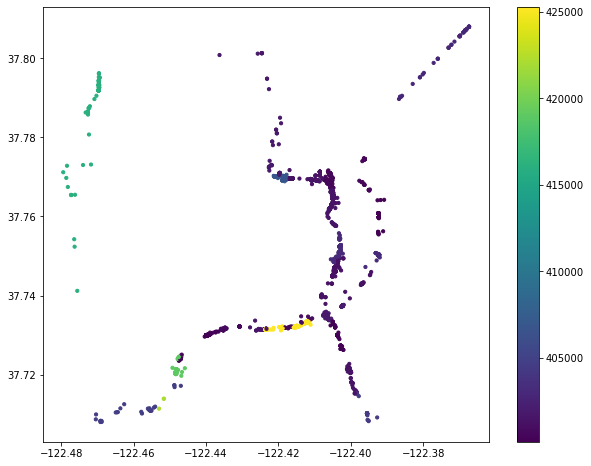

In [180]:
XX = dt[dt.vds!=-1].loc[:,['Start_Lng']]
YY = dt[dt.vds!=-1].loc[:,['Start_Lat']]
# ,'Start_Lat'
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(XX,YY,s=10,c=dt[dt.vds!=-1].vds)
plt.colorbar()
print(len(dt))

In [172]:
dt=dt[dt.vds!=-1]

In [173]:
dt

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Duration,vds
1,A-766,MapQuest,201.0,3,2016-06-21 12:46:38,2016-06-21 13:16:38,37.732746,-122.404938,NaN,NaN,...,False,False,False,Day,Day,Day,Day,12,30,400255
2,A-767,MapQuest,201.0,2,2016-06-21 12:58:04,2016-06-21 13:28:04,37.749485,-122.403236,NaN,NaN,...,False,False,False,Day,Day,Day,Day,12,30,401285
3,A-789,MapQuest,201.0,3,2016-06-21 14:57:48,2016-06-21 15:27:48,37.731983,-122.415413,NaN,NaN,...,False,False,False,Day,Day,Day,Day,14,30,425282
5,A-896,MapQuest,201.0,3,2016-06-22 13:05:41,2016-06-22 13:35:41,37.756107,-122.392464,NaN,NaN,...,False,False,False,Day,Day,Day,Day,13,30,400231
8,A-970,MapQuest,241.0,2,2016-06-23 03:33:33,2016-06-23 04:33:33,37.769375,-122.405533,NaN,NaN,...,False,False,False,Night,Night,Night,Night,3,60,400573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9263,A-4237307,Bing,NaN,2,2019-08-19 19:22:48,2019-08-19 19:52:25,37.765420,-122.404860,37.770550,-122.40553,...,False,False,False,Day,Day,Day,Day,19,29,401516
9265,A-4237855,Bing,NaN,2,2019-08-20 16:27:31,2019-08-20 16:56:45,37.770550,-122.405530,37.773039,-122.40657,...,False,False,False,Day,Day,Day,Day,16,29,400573
9266,A-4237859,Bing,NaN,2,2019-08-20 18:46:50,2019-08-20 19:15:27,37.766238,-122.405260,37.752413,-122.40303,...,False,False,False,Day,Day,Day,Day,18,28,401516
9272,A-4238922,Bing,NaN,2,2019-08-22 14:34:29,2019-08-22 15:03:33,37.752512,-122.402790,37.761970,-122.40578,...,False,False,False,Day,Day,Day,Day,14,29,403132


In [184]:
dt.sort_values(['Duration']).iloc[-1].Start_Time

'2020-11-06 07:30:30'

In [185]:
dt.sort_values(['Duration']).iloc[-1].Duration

2715

In [186]:
dt.sort_values(['Duration']).iloc[-1].vds

406871

In [126]:
hav(VDSXY[0], np.array(LINES2)[:,1])

C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(74, 119.16058785296933)

In [112]:
LINES2

[[0,
  array([  37.71749799, -122.44968617]),
  array([  37.72123161, -122.44895943])],
 [0,
  array([  37.72123161, -122.44895943]),
  array([  37.72496524, -122.44823269])],
 [1,
  array([  37.72683285, -122.44824634]),
  array([  37.72904705, -122.44471402])],
 [1,
  array([  37.72904705, -122.44471402]),
  array([  37.73126125, -122.44118169])],
 [2,
  array([  37.73126699, -122.43903389]),
  array([  37.7324656 , -122.43506457])],
 [2,
  array([  37.7324656 , -122.43506457]),
  array([  37.73366422, -122.43109525])],
 [3,
  array([  37.73366768, -122.429802  ]),
  array([  37.73308148, -122.42721802])],
 [3,
  array([  37.73308148, -122.42721802]),
  array([  37.73249528, -122.42463404])],
 [4,
  array([  37.73249815, -122.42356014]),
  array([  37.7328025 , -122.42098038])],
 [4,
  array([  37.7328025 , -122.42098038]),
  array([  37.73310685, -122.41840062])],
 [5,
  array([  37.73311144, -122.41668238]),
  array([  37.7340936 , -122.41410758])],
 [5,
  array([  37.7340936 , -12

C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([array([  37.71749799, -122.44968617]),
       array([  37.72123161, -122.44895943]),
       array([  37.72683285, -122.44824634]),
       array([  37.72904705, -122.44471402]),
       array([  37.73126699, -122.43903389]),
       array([  37.7324656 , -122.43506457]),
       array([  37.73366768, -122.429802  ]),
       array([  37.73308148, -122.42721802]),
       array([  37.73249815, -122.42356014]),
       array([  37.7328025 , -122.42098038]),
       array([  37.73311144, -122.41668238]),
       array([  37.7340936 , -122.41410758]),
       array([  37.72974735, -122.43698004]),
       array([  37.73051953, -122.43338234]),
       array([  37.73253034, -122.41151417]),
       array([  37.73474885, -122.40636871]),
       array([  37.69812232, -122.39427641]),
       array([  37.7002051, -122.3947212]),
       array([  37.70296571, -122.39517095]),
       array([  37.7042377 , -122.39544987]),
       array([  37.70615146, -122.39573348]),
       array([  37.70765377, -122.39

In [31]:
import cv2

In [34]:
import numpy as np
pts1 = np.float32([[50, 50],
                   [200, 50], 
                   [50, 200]])
  
pts2 = np.float32([[10, 100],
                   [200, 50], 
                   [100, 250]])
  
M = cv2.getAffineTransform(pts1, pts2)

In [35]:
M

array([[  1.26666667,   0.6       , -83.33333333],
       [ -0.33333333,   1.        ,  66.66666667]])

array([  37.77899933, -122.514328  ])

In [55]:
np.round(pts1[0].dot(M),1)

array([ 2.00000e-01, -1.00000e-01, -3.61555e+04])

In [61]:
help(cv2.perspectiveTransform)

Help on built-in function perspectiveTransform:

perspectiveTransform(...)
    perspectiveTransform(src, m[, dst]) -> dst
    .   @brief Performs the perspective matrix transformation of vectors.
    .   
    .   The function cv::perspectiveTransform transforms every element of src by
    .   treating it as a 2D or 3D vector, in the following way:
    .   \f[(x, y, z)  \rightarrow (x'/w, y'/w, z'/w)\f]
    .   where
    .   \f[(x', y', z', w') =  \texttt{mat} \cdot \begin{bmatrix} x & y & z & 1  \end{bmatrix}\f]
    .   and
    .   \f[w =  \fork{w'}{if \(w' \ne 0\)}{\infty}{otherwise}\f]
    .   
    .   Here a 3D vector transformation is shown. In case of a 2D vector
    .   transformation, the z component is omitted.
    .   
    .   @note The function transforms a sparse set of 2D or 3D vectors. If you
    .   want to transform an image using perspective transformation, use
    .   warpPerspective . If you have an inverse problem, that is, you want to
    .   compute the most probab